# Importing of required libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix

# Loading of the dataset

In [2]:
dt = pd.read_csv(r"C:\Users\Nafzy Flezy\Documents\DATA ANALYTICS\ONE CAMPUS\Health_data_proj1.csv")
dt

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Fe5male,61.0,0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5115,54401,Male,80.0,0,1.0,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1
5116,14248,Male,48.0,0,0.0,No,Govt_job,Urban,84.20,29.7,never smoked,1
5117,19723,Female,35.0,0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5118,37544,Male,51.0,0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Checking of data Characteristics

In [3]:
dt.shape

(5120, 12)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5120 non-null   int64  
 1   gender             5120 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5120 non-null   int64  
 4   heart_disease      5118 non-null   float64
 5   ever_married       5120 non-null   object 
 6   work_type          5120 non-null   object 
 7   Residence_type     5120 non-null   object 
 8   avg_glucose_level  5114 non-null   float64
 9   bmi                4915 non-null   float64
 10  smoking_status     5120 non-null   object 
 11  stroke             5120 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 480.1+ KB


## Copying of the original dataset

In [5]:
df = dt.copy()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Fe5male,61.0,0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5115,54401,Male,80.0,0,1.0,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1
5116,14248,Male,48.0,0,0.0,No,Govt_job,Urban,84.20,29.7,never smoked,1
5117,19723,Female,35.0,0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5118,37544,Male,51.0,0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Cleaning

In [6]:
for col in df.columns:
    print("{}: {}".format(col, df[col].unique()))

id: [ 9046 51676 31112 ... 19723 37544 44679]
gender: ['Male' 'Fe5male' 'Female' 'f ' 'MalE' 'Other' 'M ' 'MALE']
age: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24

In [7]:
df['gender'] = df['gender'].replace(['Fe5male', 'f ', 'MalE', 'M ', 'MALE'], 
                                    ['Female', 'Female', 'Male', 'Male', 'Male'])

df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [8]:
df.loc[df.gender == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0.0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [9]:
#I decided to drop that row to reduce data complexity
df = df.drop(3116)

In [10]:
df['ever_married'] = df['ever_married'].replace(['Y', 'N'], ['Yes', 'No'])
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df['work_type'] = df['work_type'].replace(['Private  ', 'Govt_job   ', 'childreen', 'Self-  employed'], 
                                          ['Private', 'Govt_job', 'children', 'Self-employed'])
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [12]:
df['Residence_type'] = df['Residence_type'].replace(['rural l', 'Urb '],
                                                    ['Rural', 'Urban'])
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [13]:
df['smoking_status'] = df['smoking_status'].replace(['Unk4nown', 'smokes   ', 'never smoked   ', 'never   smoked'],
                                                    ['Unknown', 'smokes', 'never smoked', 'never smoked'])
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

## Checking for duplicates

In [14]:
df.duplicated().sum()

10

In [15]:
df = df.drop_duplicates(inplace=False)
df.shape

(5109, 12)

In [16]:
# I removed the id column
df.drop(['id'], axis=1, inplace=True)

In [17]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## unpacking numerical data to ranges

In [18]:
interval_age = pd.interval_range(start = 0, end=max(df['age'])+20, freq=20)
interval_age                                                               

IntervalIndex([(0.0, 20.0], (20.0, 40.0], (40.0, 60.0], (60.0, 80.0], (80.0, 100.0]], dtype='interval[float64, right]')

In [19]:
age_list = []
for val in df.age.values:
    age_list.append(val)
age_list

[67.0,
 61.0,
 80.0,
 49.0,
 79.0,
 81.0,
 74.0,
 69.0,
 59.0,
 78.0,
 81.0,
 61.0,
 54.0,
 78.0,
 79.0,
 50.0,
 64.0,
 75.0,
 60.0,
 57.0,
 71.0,
 52.0,
 79.0,
 82.0,
 71.0,
 80.0,
 65.0,
 58.0,
 69.0,
 59.0,
 57.0,
 42.0,
 82.0,
 80.0,
 48.0,
 82.0,
 74.0,
 72.0,
 58.0,
 49.0,
 78.0,
 54.0,
 82.0,
 63.0,
 60.0,
 76.0,
 75.0,
 58.0,
 81.0,
 39.0,
 76.0,
 78.0,
 79.0,
 77.0,
 63.0,
 63.0,
 82.0,
 78.0,
 73.0,
 54.0,
 56.0,
 80.0,
 67.0,
 45.0,
 75.0,
 78.0,
 70.0,
 76.0,
 59.0,
 80.0,
 76.0,
 67.0,
 66.0,
 63.0,
 52.0,
 80.0,
 80.0,
 79.0,
 51.0,
 43.0,
 59.0,
 66.0,
 79.0,
 68.0,
 58.0,
 54.0,
 61.0,
 70.0,
 47.0,
 74.0,
 79.0,
 81.0,
 57.0,
 80.0,
 45.0,
 78.0,
 70.0,
 58.0,
 57.0,
 69.0,
 64.0,
 77.0,
 74.0,
 81.0,
 57.0,
 58.0,
 50.0,
 54.0,
 79.0,
 53.0,
 79.0,
 80.0,
 76.0,
 45.0,
 68.0,
 71.0,
 61.0,
 74.0,
 38.0,
 77.0,
 58.0,
 53.0,
 80.0,
 56.0,
 72.0,
 72.0,
 78.0,
 80.0,
 82.0,
 75.0,
 73.0,
 78.0,
 69.0,
 38.0,
 68.0,
 71.0,
 76.0,
 76.0,
 76.0,
 75.0,
 82.0,
 59.0,
 74.0,

In [20]:
df.insert(2, 'age_range', age_list)

In [21]:
df['age_range'] = pd.cut(x=df['age_range'], bins=interval_age)

In [22]:
interval_glucose = pd.interval_range(start = 0, end=max(df['avg_glucose_level'])+50, freq=50)
interval_glucose

IntervalIndex([(0.0, 50.0], (50.0, 100.0], (100.0, 150.0], (150.0, 200.0], (200.0, 250.0], (250.0, 300.0]], dtype='interval[float64, right]')

In [23]:
glu_list = []
for val in df.avg_glucose_level.values:
    glu_list.append(val)
glu_list

[228.69,
 202.21,
 105.92,
 171.23,
 174.12,
 186.21,
 70.09,
 94.39,
 76.15,
 58.57,
 80.43,
 120.46,
 104.51,
 219.84,
 214.09,
 167.41,
 191.61,
 221.29,
 89.22,
 217.08,
 193.94,
 233.29,
 228.7,
 208.3,
 102.87,
 104.12,
 100.98,
 189.84,
 195.23,
 211.78,
 212.08,
 83.41,
 196.92,
 252.72,
 84.2,
 84.03,
 219.72,
 74.63,
 92.62,
 60.91,
 78.03,
 71.22,
 144.9,
 90.9,
 213.03,
 243.58,
 109.78,
 107.26,
 99.33,
 58.09,
 89.96,
 75.32,
 127.29,
 124.13,
 197.54,
 196.71,
 59.32,
 237.75,
 194.99,
 180.93,
 185.17,
 74.9,
 61.94,
 93.72,
 104.72,
 113.01,
 221.58,
 104.47,
 86.23,
 72.67,
 62.57,
 179.12,
 116.55,
 228.56,
 96.59,
 66.72,
 240.09,
 110.85,
 165.31,
 143.43,
 96.16,
 101.45,
 88.92,
 79.79,
 71.2,
 96.97,
 111.81,
 59.35,
 86.94,
 98.55,
 226.98,
 72.81,
 68.02,
 68.56,
 64.14,
 235.63,
 76.34,
 240.59,
 78.92,
 82.81,
 74.1,
 190.32,
 231.61,
 78.7,
 110.52,
 82.3,
 73.18,
 191.82,
 93.05,
 64.17,
 129.98,
 68.53,
 106.41,
 224.1,
 82.1,
 216.94,
 76.11,
 72.96,
 82

In [24]:
df.insert(8, 'glucose_range', glu_list)

In [25]:
df['glucose_range'] = pd.cut(x=df['glucose_range'], bins=interval_glucose)

In [26]:
interval_bmi = pd.interval_range(start = 0, end=max(df['bmi'])+20, freq=20)
interval_bmi

IntervalIndex([(0.0, 20.0], (20.0, 40.0], (40.0, 60.0], (60.0, 80.0], (80.0, 100.0]], dtype='interval[float64, right]')

In [27]:
bmi_list = []
for val in df.bmi.values:
    bmi_list.append(val)
bmi_list

[36.6,
 nan,
 32.5,
 34.4,
 24.0,
 29.0,
 27.4,
 22.8,
 nan,
 24.2,
 29.7,
 36.8,
 27.3,
 nan,
 28.2,
 30.9,
 37.5,
 25.8,
 37.8,
 nan,
 22.4,
 48.9,
 26.6,
 32.5,
 27.2,
 23.5,
 28.2,
 nan,
 28.3,
 nan,
 44.2,
 25.4,
 22.2,
 30.5,
 29.7,
 26.5,
 33.7,
 23.1,
 32.0,
 29.9,
 23.9,
 28.5,
 26.4,
 nan,
 20.2,
 33.6,
 nan,
 38.6,
 33.7,
 39.2,
 nan,
 nan,
 27.7,
 31.4,
 nan,
 36.5,
 33.2,
 nan,
 32.8,
 27.7,
 40.4,
 22.2,
 25.3,
 30.2,
 nan,
 24.0,
 47.5,
 20.3,
 30.0,
 28.9,
 nan,
 28.1,
 31.1,
 27.4,
 26.4,
 21.7,
 27.0,
 24.1,
 nan,
 45.9,
 44.1,
 nan,
 22.9,
 29.7,
 nan,
 29.1,
 27.3,
 32.3,
 41.1,
 25.6,
 29.8,
 26.3,
 37.5,
 26.2,
 29.4,
 32.3,
 24.4,
 31.4,
 27.7,
 28.0,
 28.8,
 31.4,
 34.6,
 19.4,
 28.5,
 nan,
 30.3,
 40.4,
 24.2,
 41.5,
 22.6,
 24.2,
 nan,
 56.6,
 27.1,
 30.9,
 27.3,
 31.3,
 24.0,
 31.0,
 28.0,
 30.3,
 31.7,
 35.8,
 nan,
 28.4,
 nan,
 24.0,
 29.0,
 nan,
 36.5,
 20.1,
 36.5,
 nan,
 26.7,
 38.7,
 29.9,
 34.9,
 27.0,
 26.6,
 25.0,
 23.8,
 21.8,
 36.8,
 30.0,
 27.5,
 

In [28]:
df.insert(11, 'bmi_range', bmi_list)

In [29]:
df['bmi_range'] = pd.cut(x=df['bmi_range'], bins=interval_bmi)

In [30]:
'''df.drop(['age_range'], axis=1, inplace=True)'''
df

,gender,age,age_range,hypertension,heart_disease,ever_married,work_type,Residence_type,glucose_range,avg_glucose_level,bmi,bmi_range,smoking_status,stroke
0,Male,67.0,"(60.0, 80.0]",0,1.0,Yes,Private,Urban,"(200.0, 250.0]",228.69,36.6,"(20.0, 40.0]",formerly smoked,1
1,Female,61.0,"(60.0, 80.0]",0,0.0,Yes,Self-employed,Rural,"(200.0, 250.0]",202.21,NaN,NaN,never smoked,1
2,Male,80.0,"(60.0, 80.0]",0,1.0,Yes,Private,Rural,"(100.0, 150.0]",105.92,32.5,"(20.0, 40.0]",never smoked,1
3,Female,49.0,"(40.0, 60.0]",0,0.0,Yes,Private,Urban,"(150.0, 200.0]",171.23,34.4,"(20.0, 40.0]",smokes,1
4,Female,79.0,"(60.0, 80.0]",1,0.0,Yes,Self-employed,Rural,"(150.0, 200.0]",174.12,24.0,"(20.0, 40.0]",never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,"(60.0, 80.0]",1,0.0,Yes,Private,Urban,"(50.0, 100.0]",83.75,NaN,NaN,never smoked,0
5106,Female,81.0,"(80.0, 100.0]",0,0.0,Yes,Self-employed,Urban,"(100.0, 150.0]",125.20,40.0,"(20.0, 40.0]",never smoked,0
5117,Female,35.0,"(20.0, 40.0]",0,0.0,Yes,Self-employed,Rural,"(50.0, 100.0]",82.99,30.6,"(20.0, 40.0]",never smoked,0
5118,Male,51.0,"(40.0, 60.0]",0,0.0,Yes,Private,Rural,"(150.0, 200.0]",166.29,25.6,"(20.0, 40.0]",formerly smoked,0


# Data Visualization

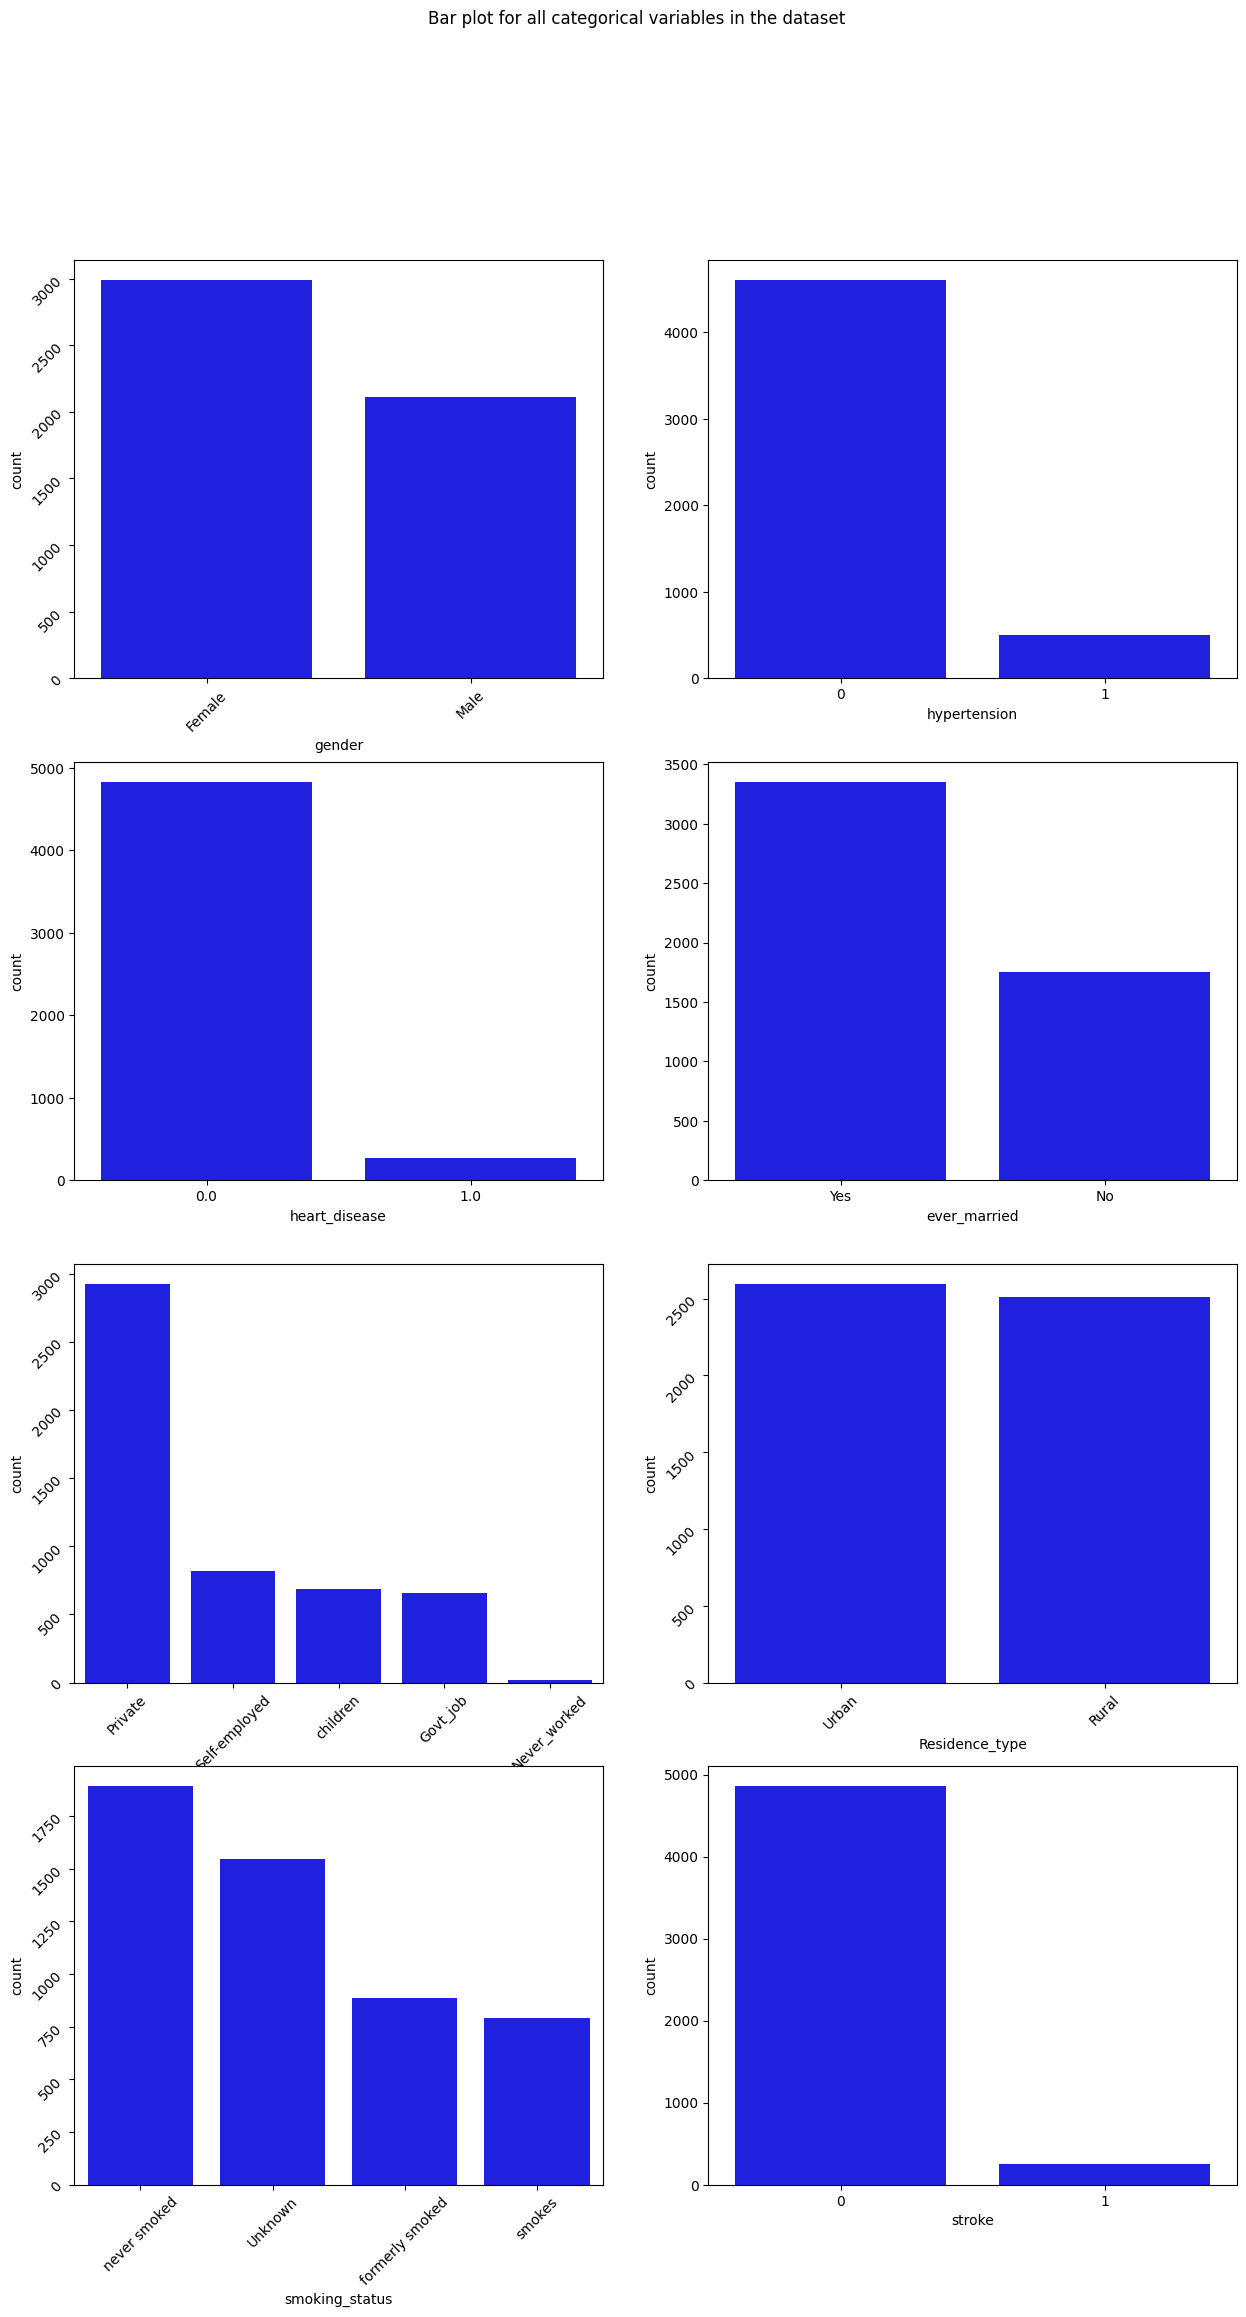

In [32]:
fig, axes = plt.subplots(4, 2, figsize = (15, 25))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'gender', data = df, color = 'blue', 
              order = df['gender'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'hypertension', data = df, color = 'blue', 
              order = df['hypertension'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'heart_disease', data = df, color = 'blue', 
              order = df['heart_disease'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'ever_married', data = df, color = 'blue', 
              order = df['ever_married'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'work_type', data = df, color = 'blue', 
              order = df['work_type'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Residence_type', data = df, color = 'blue', 
              order = df['Residence_type'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'smoking_status', data = df, color = 'blue',
            order = df['smoking_status'].value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'stroke', data = df, color = 'blue',
            order = df['stroke'].value_counts().index);
axes[0][0].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=45);
axes[2][1].tick_params(labelrotation=45);
axes[3][0].tick_params(labelrotation=45);

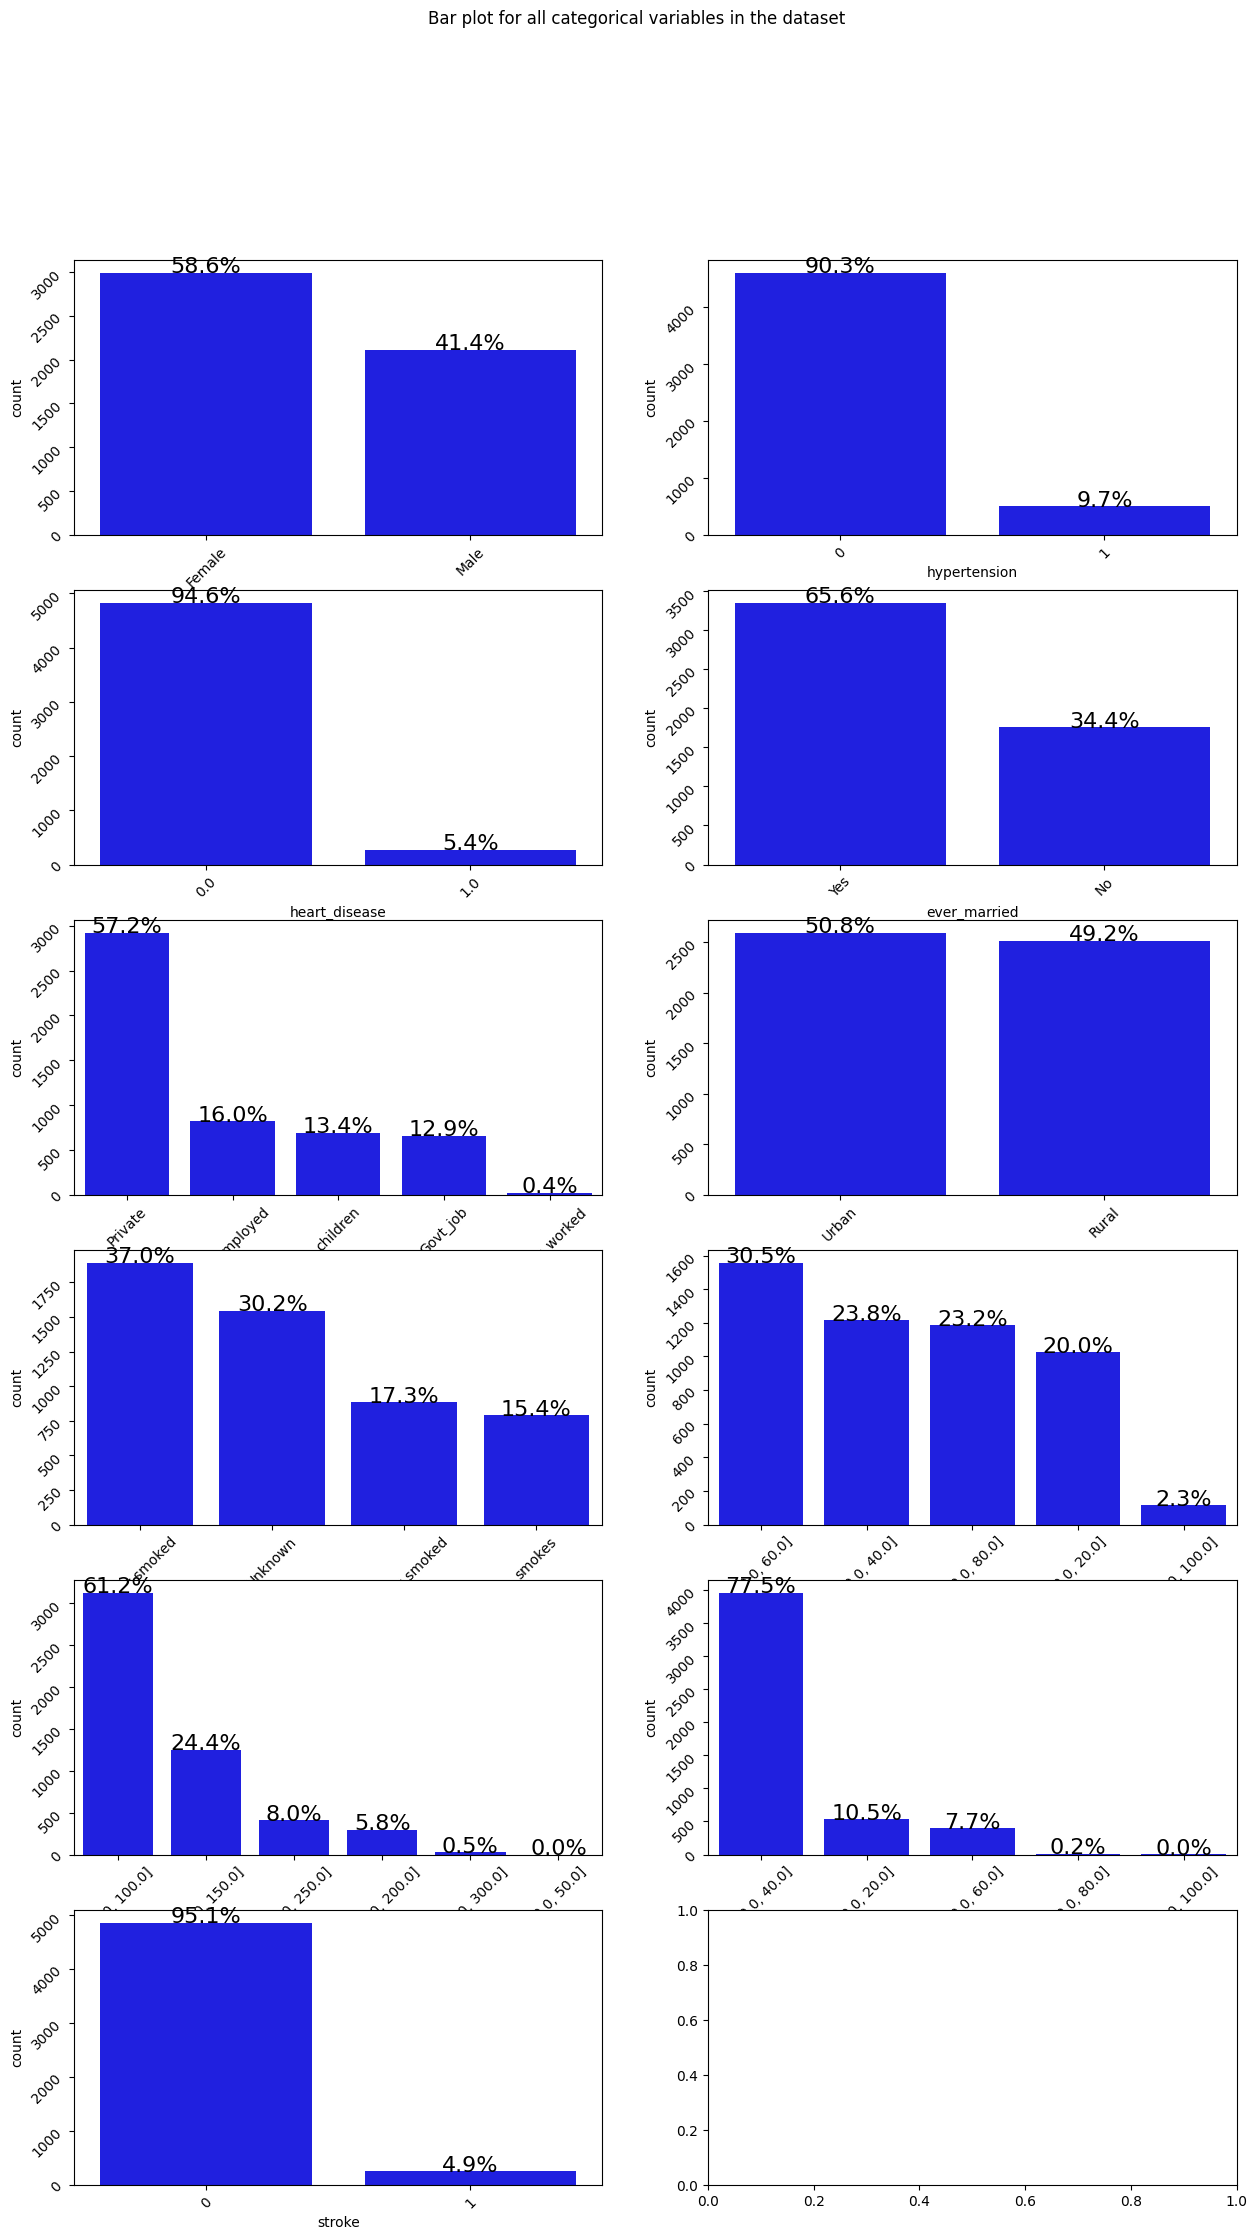

In [43]:
fig, axes = plt.subplots(6, 2, figsize=(15, 25))
fig.suptitle('Bar plot for all categorical variables in the dataset')

# Loop through columns and create countplots
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status', 'age_range', 'glucose_range', 'bmi_range', 'stroke']  # Select categorical columns
for i, cols in enumerate(columns):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    sns.countplot(x=cols, data=df, color='blue', order=df[cols].value_counts().index, ax=ax)
    ax.tick_params(labelrotation=45)
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', fontsize=16)

plt.show()

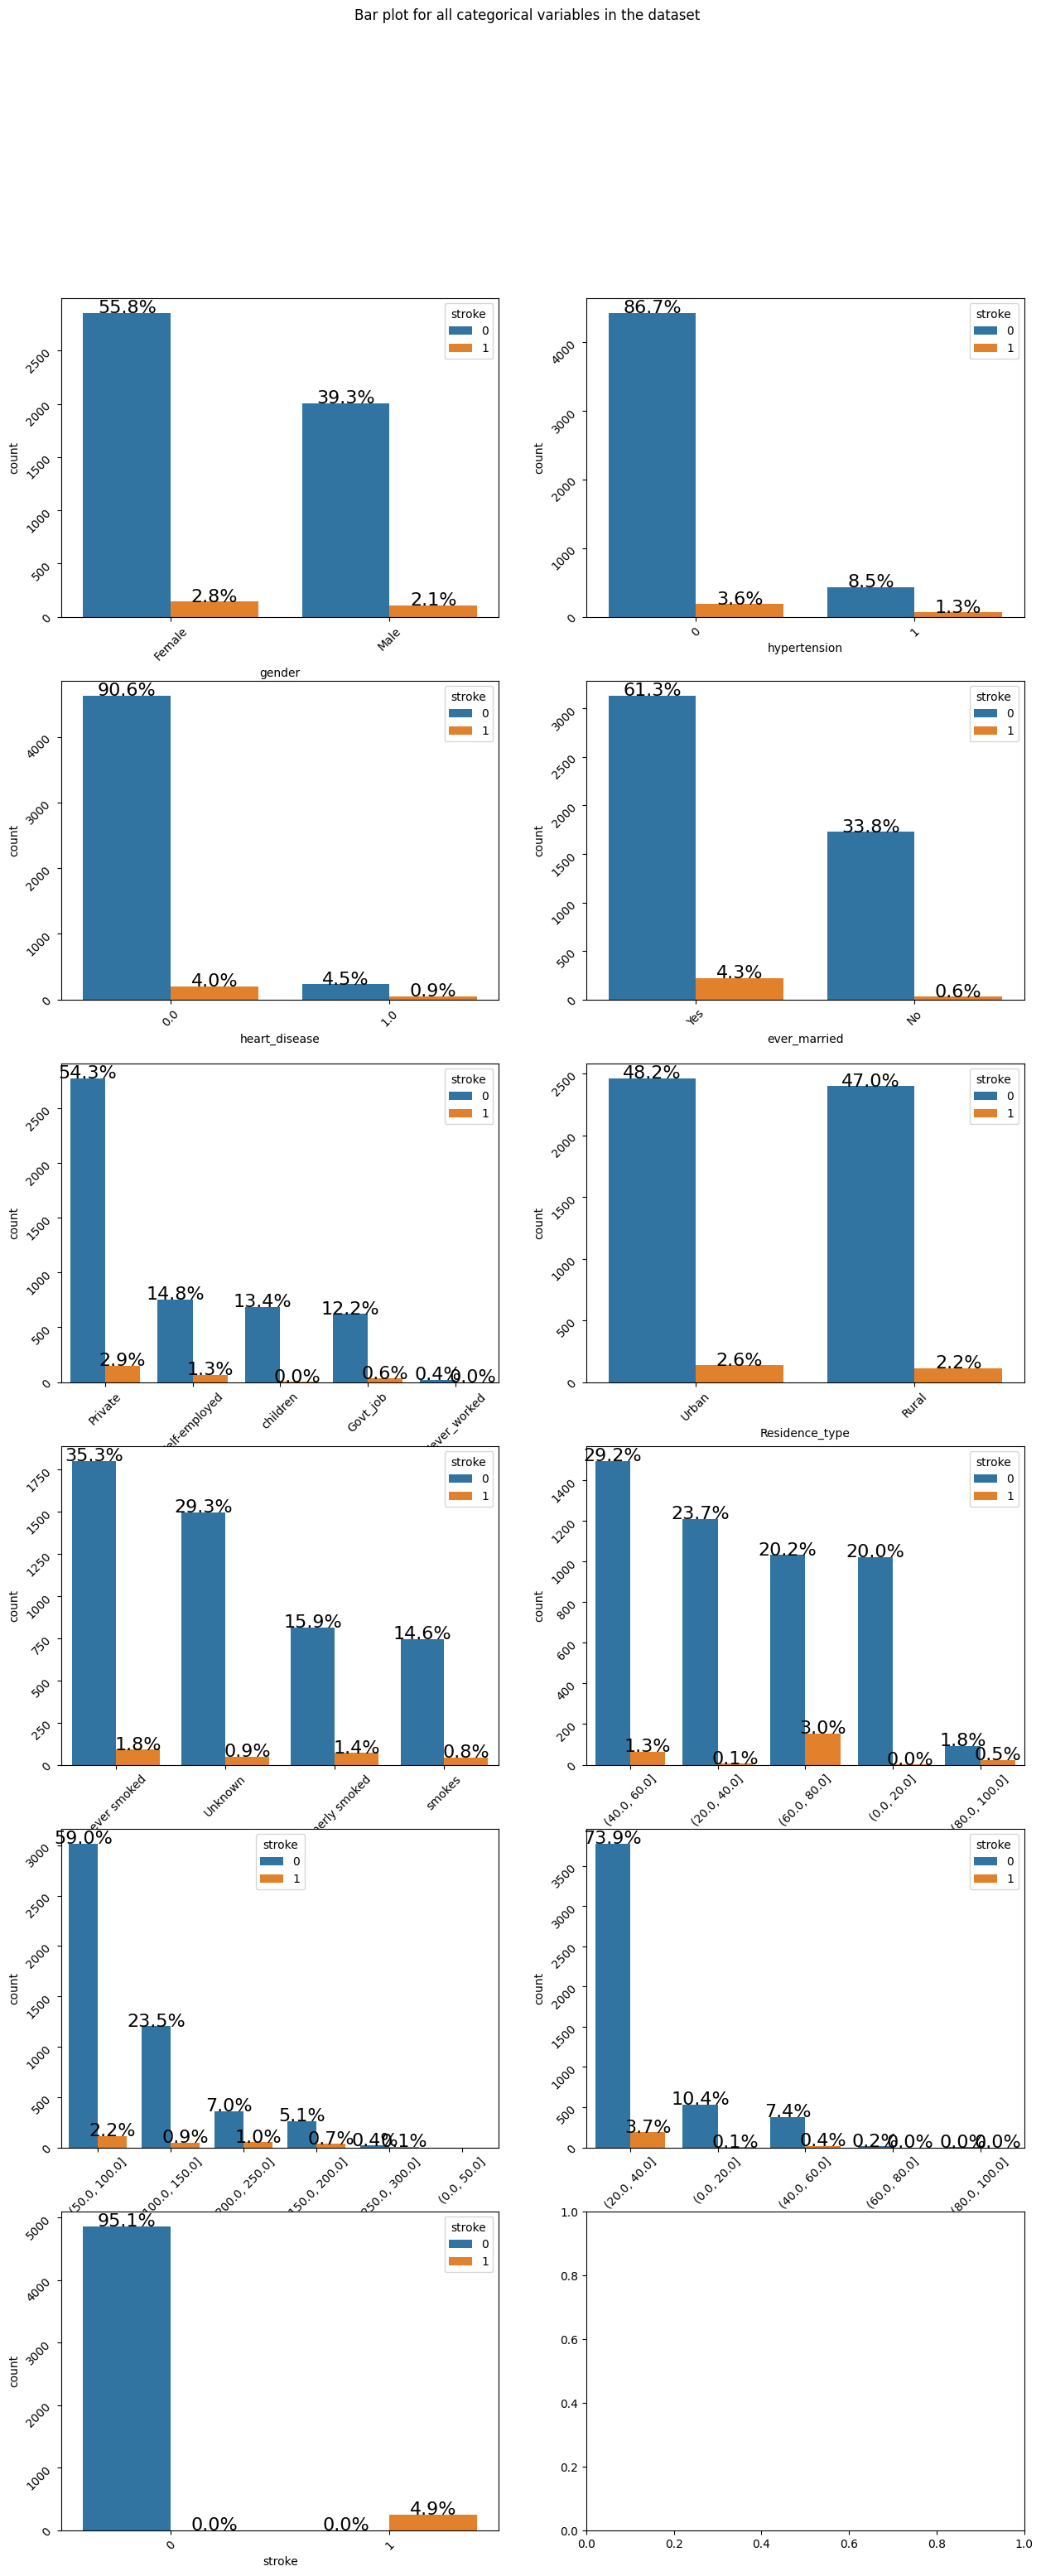

In [45]:
fig, axes = plt.subplots(6, 2, figsize=(15, 35))
fig.suptitle('Bar plot for all categorical variables in the dataset')

# Loop through columns and create countplots
colum = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status', 'age_range', 'glucose_range', 'bmi_range']  # Select categorical columns
for i, cols in enumerate(columns):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    sns.countplot(x=cols, data=df, hue='stroke', order=df[cols].value_counts().index, ax=ax)
    ax.tick_params(labelrotation=45)
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', fontsize=16)

plt.show()

There was not so much difference between those with stroke in male and female.

Non-hypertensive persons had stroke than hypertensive persons.

People without heart disease had stroke than those with it.

The ever-married population had stroke than those that has never married.

People that work in a private organisation were the highest population to have stroke followed by the self-employed.

There was no so much difference between those that live in urban and rural areas.

The populations that has never smoked had  strokes than those that smokes or had a history.

The population between age 60 and 80 had more occurrence of persons with stroke followed by age group of 40-60.

Persons with average glucose level between 50-100 had more occurrencesof patients with stroke than any other groups.

People with bmi of 20-40 had more occurrences of stroke than any other group.

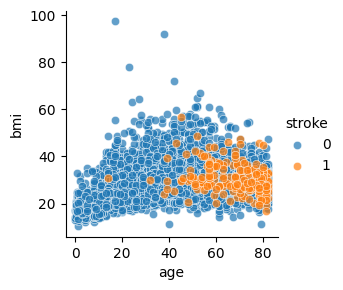

In [53]:
g = sns.FacetGrid(df, hue="stroke")
g.map(sns.scatterplot, "age", "bmi", alpha=.7)
g.add_legend()

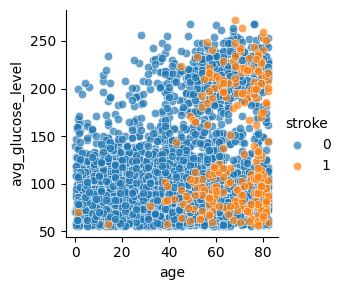

In [57]:
g = sns.FacetGrid(df, hue="stroke")
g.map(sns.scatterplot, "age", "avg_glucose_level", alpha=.7)
g.add_legend()

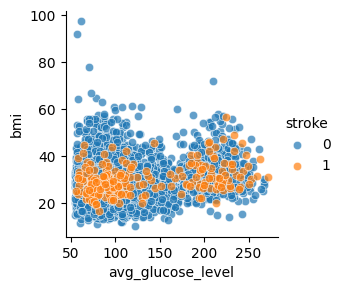

In [59]:
g = sns.FacetGrid(df, hue="stroke")
g.map(sns.scatterplot, "avg_glucose_level", "bmi", alpha=.7)
g.add_legend()

There was no significant correlation between age, bmi and average glucose level. However it can be seen that the older population had more incidence of stroke than the younger population.

## Checking for null

In [60]:

df = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
         'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0.0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0.0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5117,Female,35.0,0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5118,Male,51.0,0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [61]:
missCol = df.isnull().sum()
colList = df.columns.tolist()
NulList = []

for row, col in zip(missCol, colList):
    if row > int(0):
        Nil = col + ' = ' + str(row)
        NulList.append(Nil)
NulList

['age = 10', 'heart_disease = 2', 'avg_glucose_level = 6', 'bmi = 203']

In [62]:
"""
Creating a table filled with the null values to be predicted later with the model
"""
null_table = pd.DataFrame(columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'])
null_table

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [63]:
null_table.append(df[df.isnull().any(axis=1)])

C:\Users\Nafzy Flezy\AppData\Local\Temp\ipykernel_8232\715628337.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  null_table.append(df[df.isnull().any(axis=1)])


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.00,0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.00,0,0.0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.00,0,1.0,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.00,0,1.0,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.00,0,0.0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5095,Male,1.08,0,0.0,No,children,Rural,79.15,NaN,Unknown,0
5098,Male,9.00,0,0.0,No,children,Urban,NaN,17.5,Unknown,0
5099,Male,NaN,0,0.0,Yes,Private,Rural,83.94,NaN,smokes,0
5103,Female,18.00,0,0.0,No,Private,Urban,NaN,46.9,Unknown,0


In [64]:
df_without_null = df[~df.isnull().any(axis=1)]
df_without_null

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0.0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0.0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5117,Female,35.0,0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5118,Male,51.0,0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [65]:
#Copying dataset without null which will be used as well to train our model
df2 = df_without_null.copy()

In [66]:
"""
filling the original dataset, Age and avg_glucose_leavel with mean value while hear_disease and bmi
were filled with meadian value. This was donedue to the type of values present in the non-value spaces.
"""

df['age'].fillna(df['age'].mean(), inplace=True)
df['avg_glucose_level'].fillna(df['avg_glucose_level'].mean(), inplace=True)
df['heart_disease'].fillna(df['heart_disease'].median(), inplace=True)
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Users\Nafzy Flezy\AppData\Local\Temp\ipykernel_8232\1483406385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\Nafzy Flezy\AppData\Local\Temp\ipykernel_8232\1483406385.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_glucose_level'].fillna(df['avg_glucose_level'].mean(), inplace=True)
C:\Users\Nafzy Flezy\AppData\Local\Temp\ipykernel_8232\1483406385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5119
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   float64
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 479.0+ KB


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5119
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4891 non-null   object 
 1   age                4891 non-null   float64
 2   hypertension       4891 non-null   int64  
 3   heart_disease      4891 non-null   float64
 4   ever_married       4891 non-null   object 
 5   work_type          4891 non-null   object 
 6   Residence_type     4891 non-null   object 
 7   avg_glucose_level  4891 non-null   float64
 8   bmi                4891 non-null   float64
 9   smoking_status     4891 non-null   object 
 10  stroke             4891 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 458.5+ KB


## Note: Onward, df is dataset with filled arbitary values for null values while df2 is the dataset with dropped null values to be predicted later

# Data Preprocessing

## Converting categorical data to numerical data

In [69]:
cat = df.select_dtypes('object').columns
num = df.select_dtypes(['float64', 'int64']).columns
print(num)
print(cat)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [70]:
encoder = LabelEncoder()
for ca in cat:
    df[ca] = encoder.fit_transform(df[ca])
df

C:\Users\Nafzy Flezy\AppData\Local\Temp\ipykernel_8232\3677571685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ca] = encoder.fit_transform(df[ca])
C:\Users\Nafzy Flezy\AppData\Local\Temp\ipykernel_8232\3677571685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ca] = encoder.fit_transform(df[ca])
C:\Users\Nafzy Flezy\AppData\Local\Temp\ipykernel_8232\3677571685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1.0,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0.0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1.0,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0.0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0.0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0.0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0.0,1,3,1,125.20,40.0,2,0
5117,0,35.0,0,0.0,1,3,0,82.99,30.6,2,0
5118,1,51.0,0,0.0,1,2,0,166.29,25.6,1,0


Gender: Male = 1, Female = 0

ever_married: Yes = 1, No = 0

work_type: Private = 2 Self-employed = 3  Govt_job = 0 children = 4 Never_worked = 1

Residence_type: Urban = 1, Rural = 0

smoking_status: Unknown = 0, formerly smoked = 1, never smoked = 2, smokes = 3

In [71]:
encoder = LabelEncoder()
for ca in cat:
    df2[ca] = encoder.fit_transform(df2[ca])
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1.0,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1.0,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0.0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0.0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0.0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0.0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0.0,1,3,1,125.20,40.0,2,0
5117,0,35.0,0,0.0,1,3,0,82.99,30.6,2,0
5118,1,51.0,0,0.0,1,2,0,166.29,25.6,1,0


Gender: Male = 1, Female = 0

ever_married: Yes = 1, No = 0

work_type: Private = 2 Self-employed = 3  Govt_job = 0 children = 4 Never_worked = 1

Residence_type: Urban = 1, Rural = 0

smoking_status: Unknown = 0, formerly smoked = 1, never smoked = 2, smokes = 3

## Checking for correlations between features

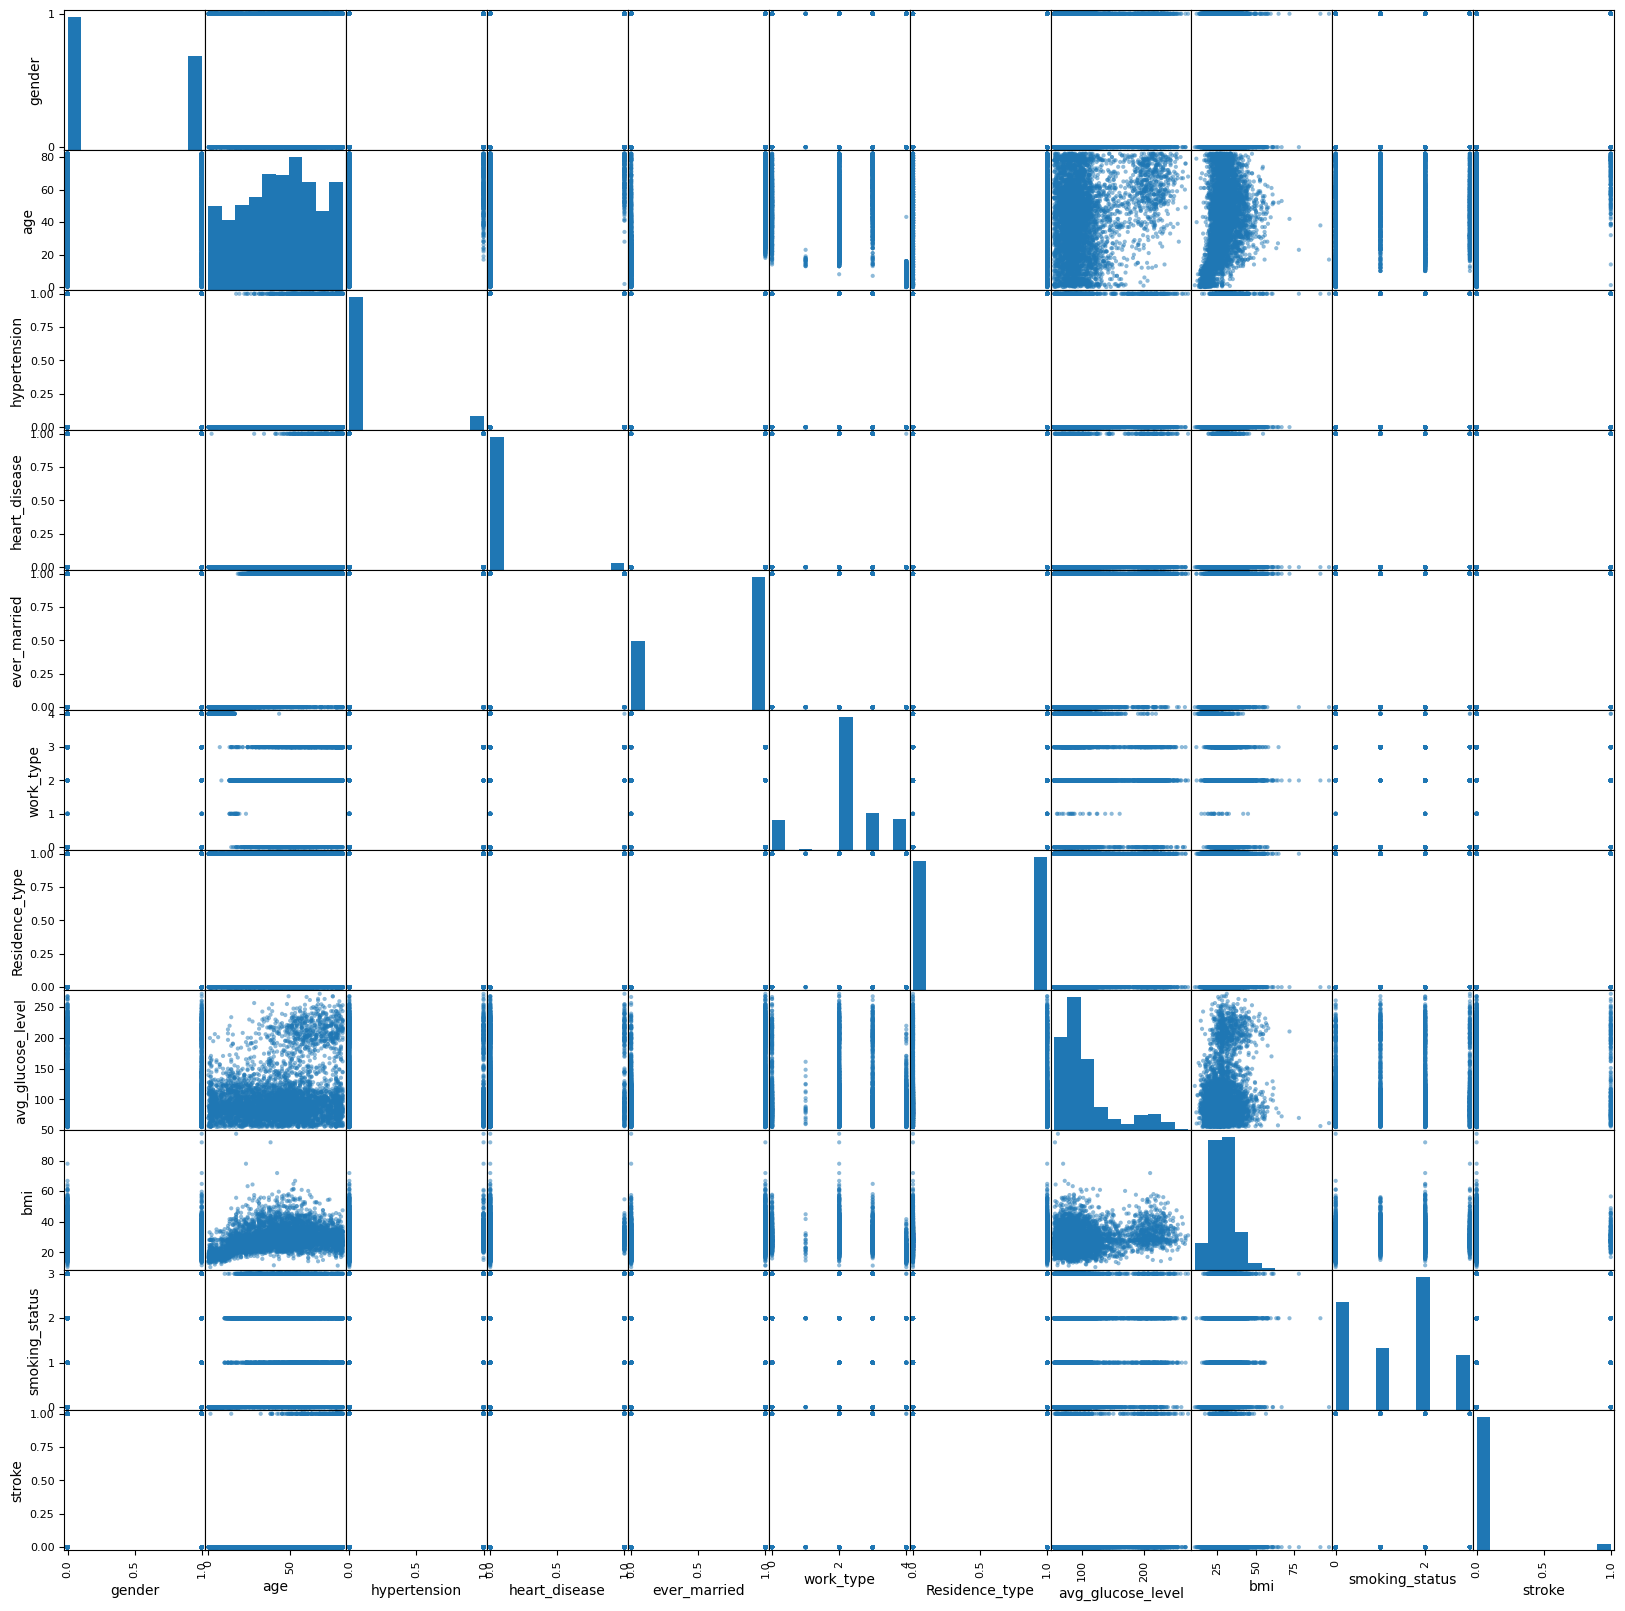

In [72]:
scatter_matrix(df)
plt.gcf().set_size_inches((20,20))
plt.show()

<AxesSubplot: >

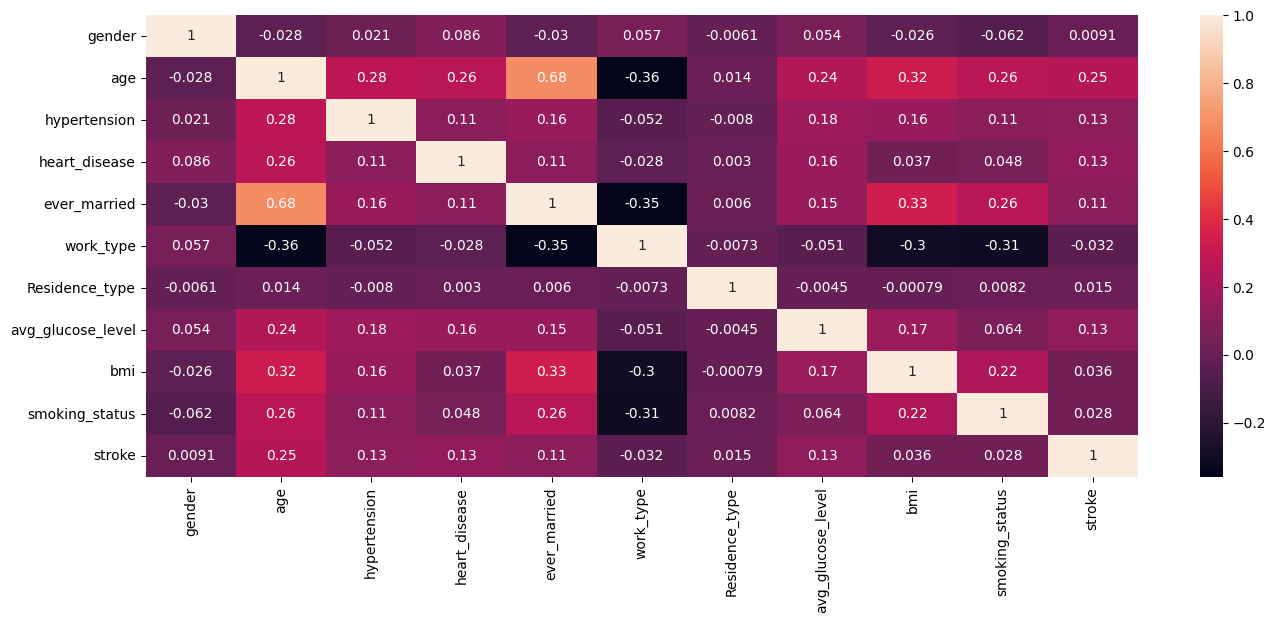

In [73]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)

There is a strong positive correlation between age and marriage status

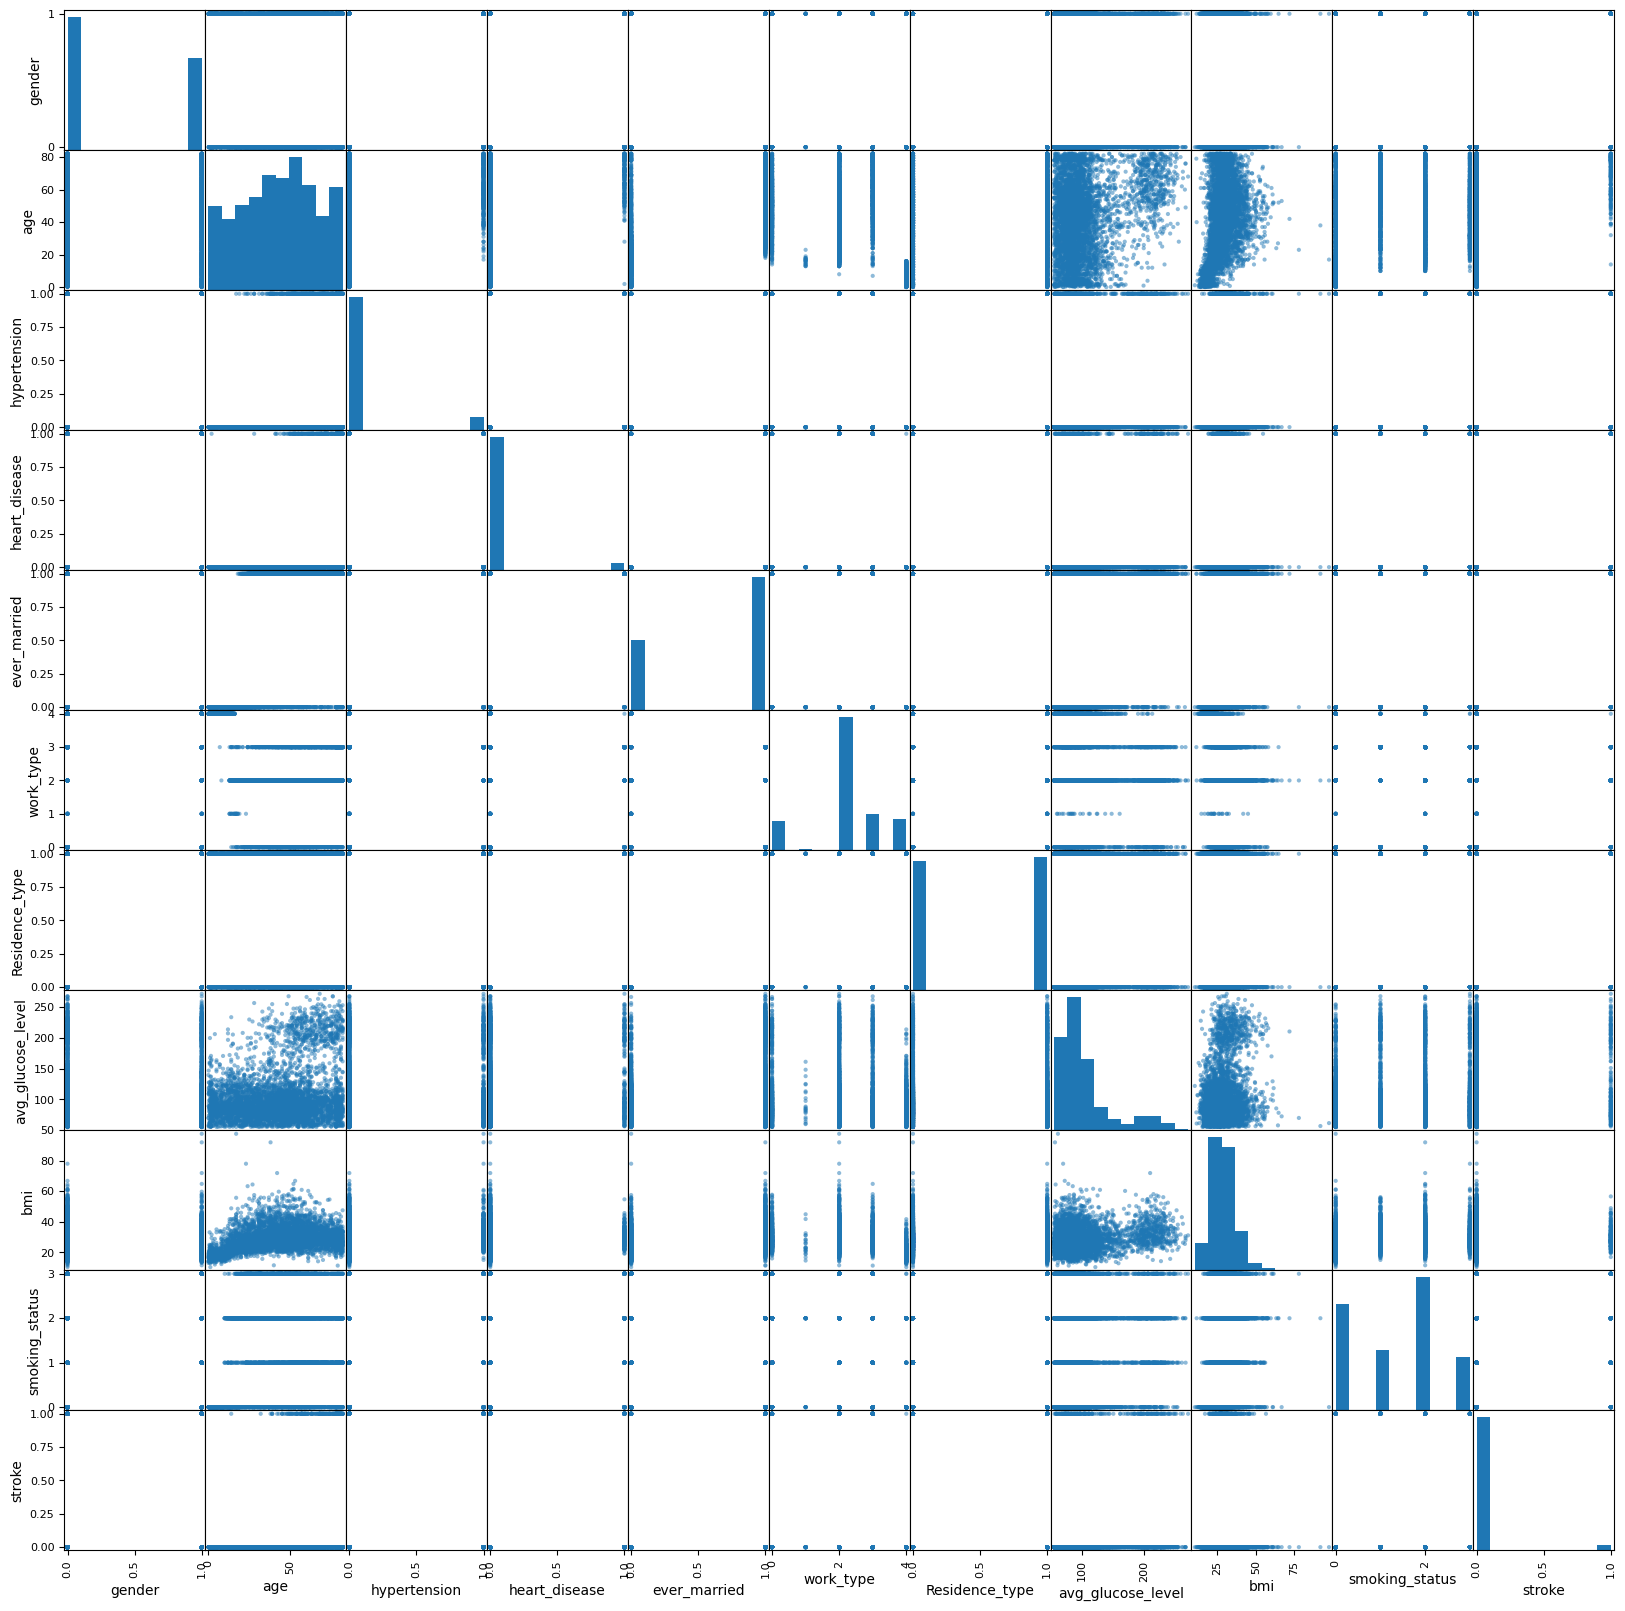

In [76]:
scatter_matrix(df2)
plt.gcf().set_size_inches((20,20))
plt.show()

<AxesSubplot: >

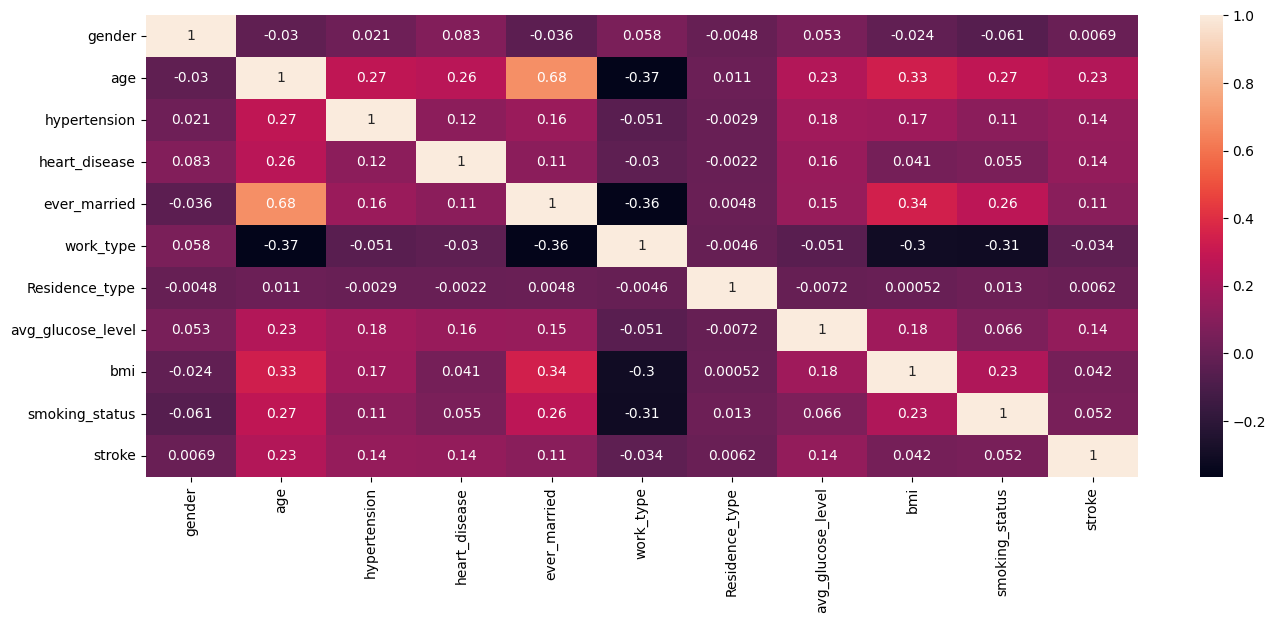

In [77]:
plt.figure(figsize=(16,6))
sns.heatmap(df2.corr(), annot=True)

There is a strong positive correlation between age and marriage status

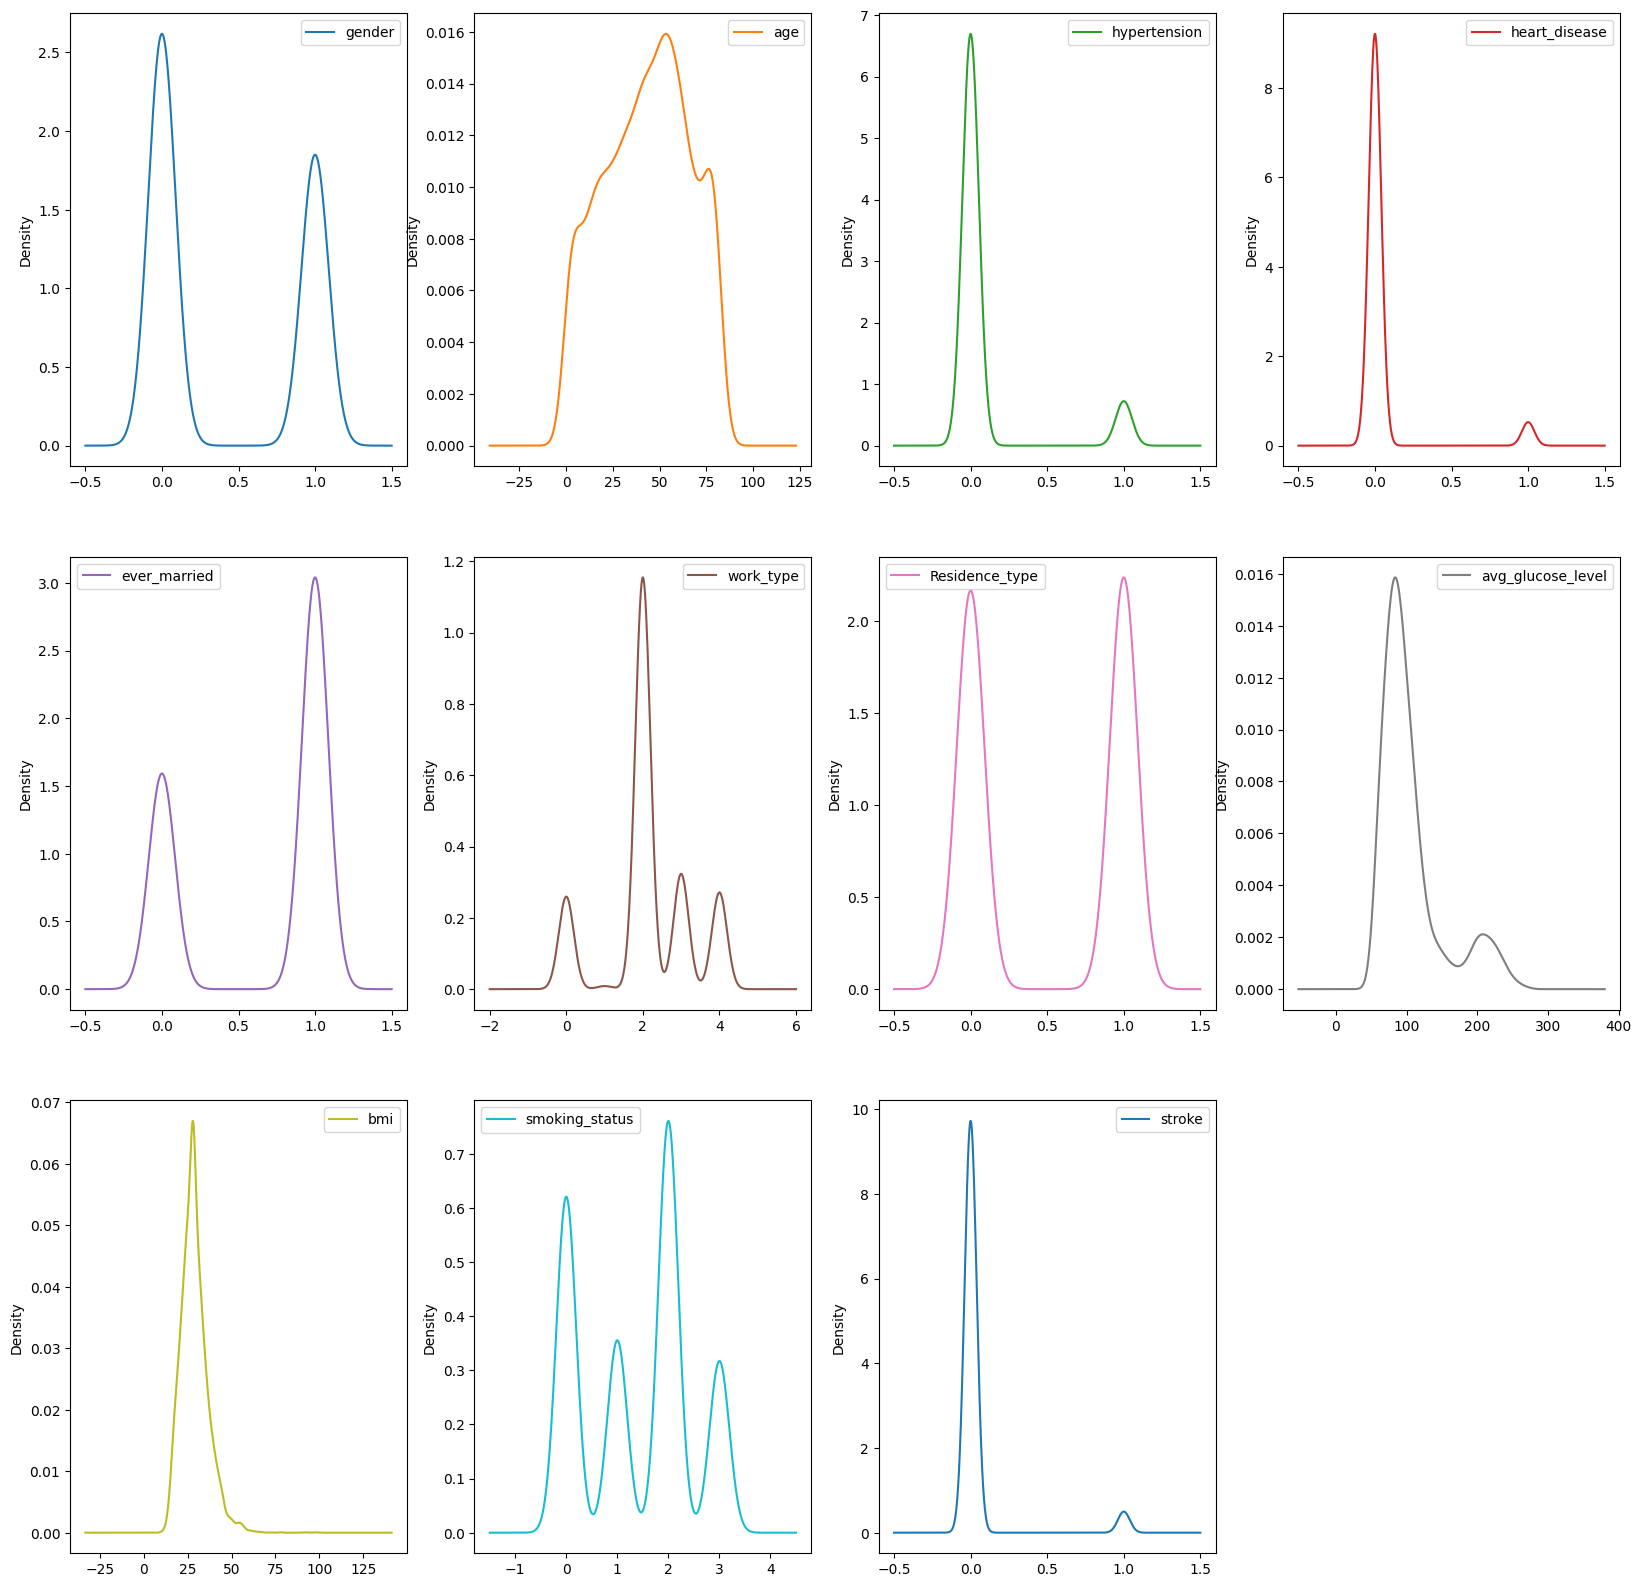

In [79]:
df.plot(kind='density', subplots=True,  layout=(3,4), sharex=False)
plt.gcf().set_size_inches((20, 20))
plt.show()

gender                  AxesSubplot(0.125,0.653529;0.168478x0.226471)
age                  AxesSubplot(0.327174,0.653529;0.168478x0.226471)
hypertension         AxesSubplot(0.529348,0.653529;0.168478x0.226471)
heart_disease        AxesSubplot(0.731522,0.653529;0.168478x0.226471)
ever_married            AxesSubplot(0.125,0.381765;0.168478x0.226471)
work_type            AxesSubplot(0.327174,0.381765;0.168478x0.226471)
Residence_type       AxesSubplot(0.529348,0.381765;0.168478x0.226471)
avg_glucose_level    AxesSubplot(0.731522,0.381765;0.168478x0.226471)
bmi                         AxesSubplot(0.125,0.11;0.168478x0.226471)
smoking_status           AxesSubplot(0.327174,0.11;0.168478x0.226471)
stroke                   AxesSubplot(0.529348,0.11;0.168478x0.226471)
dtype: object

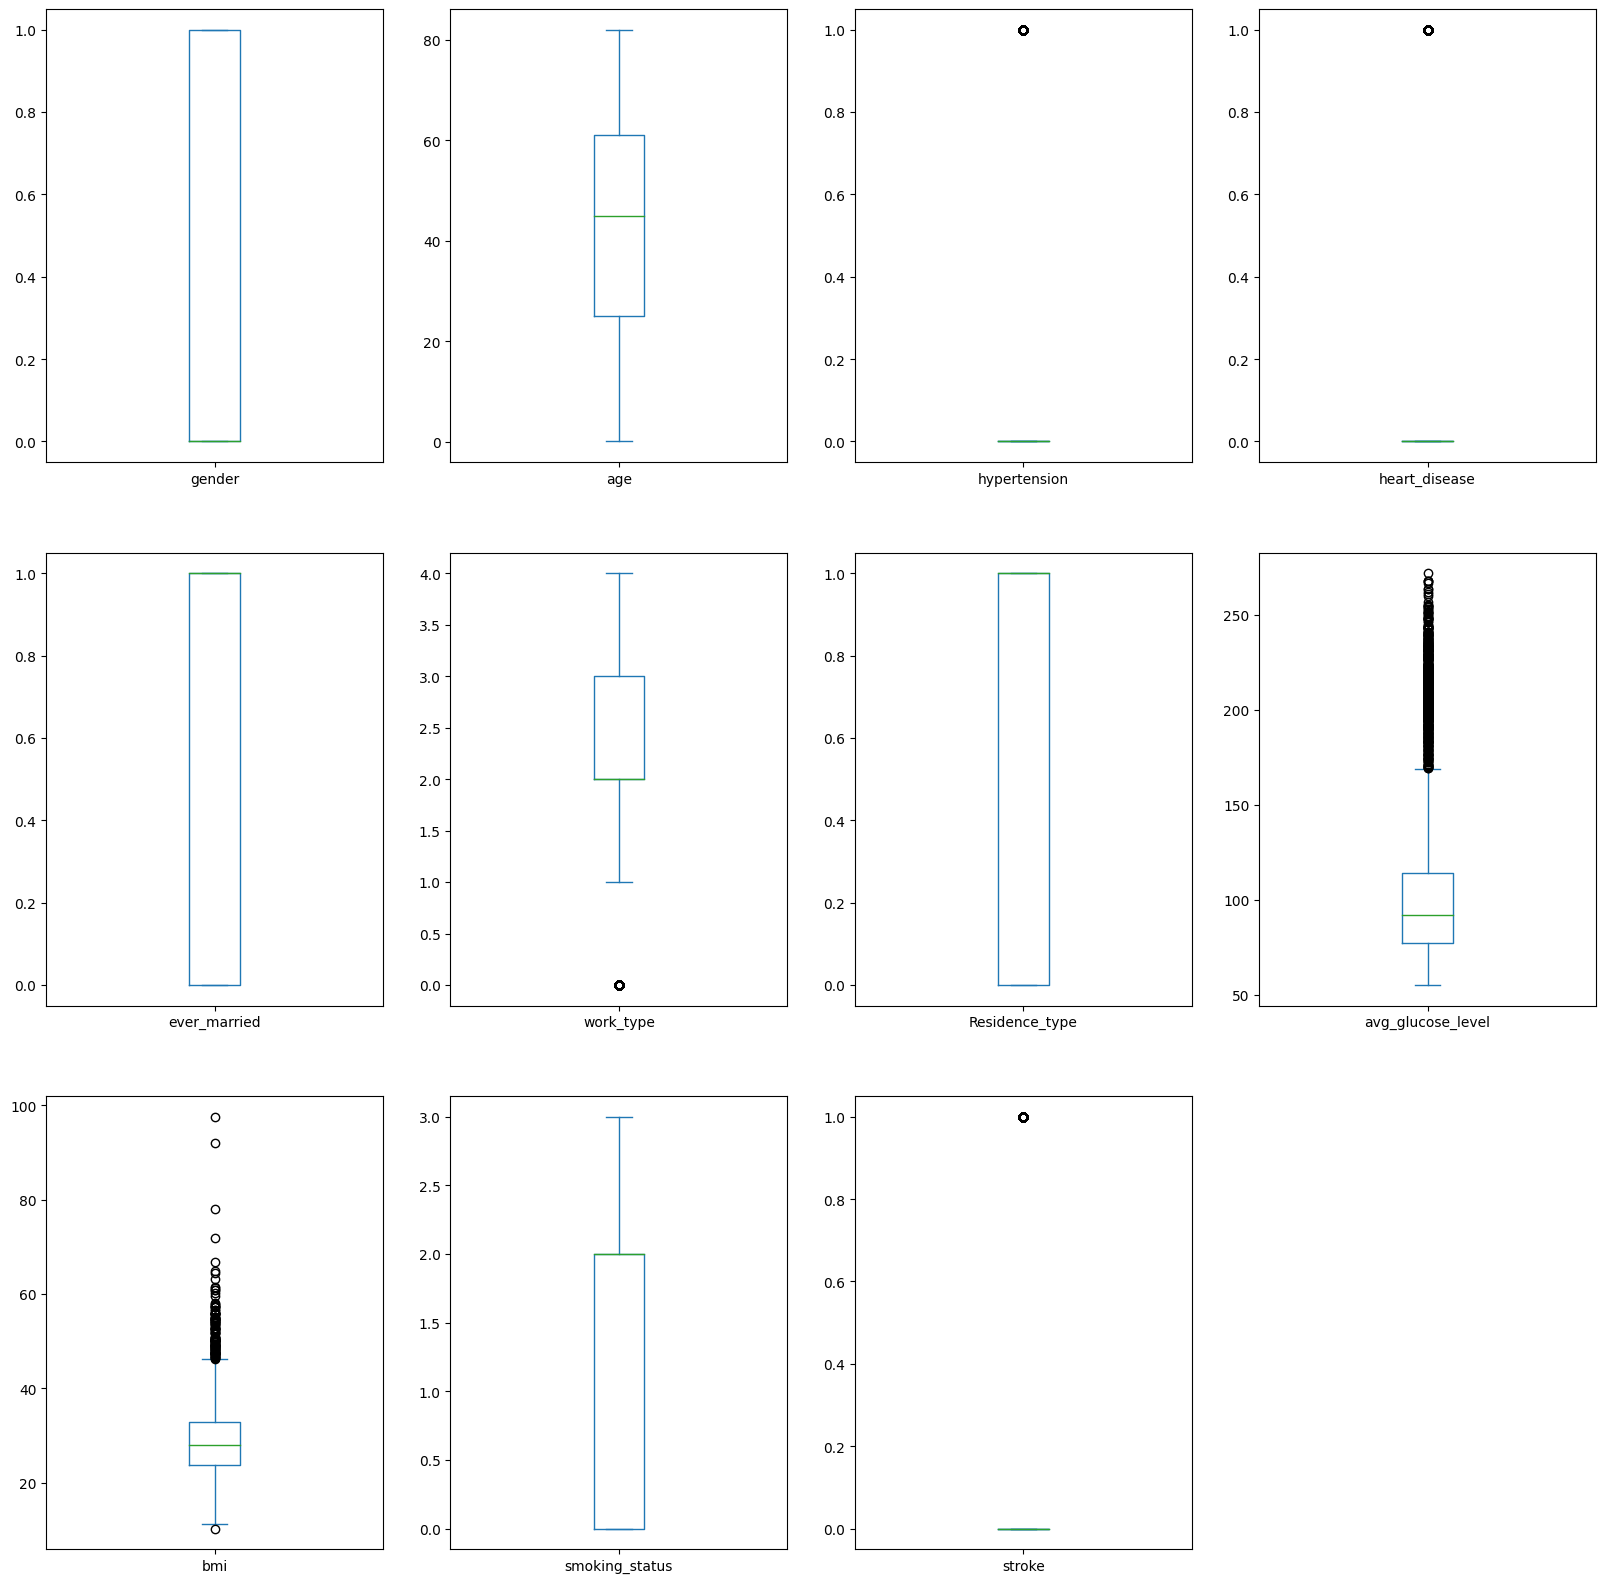

In [80]:
df.plot(kind='box', subplots=True, layout=(3,4), figsize=(20,20))

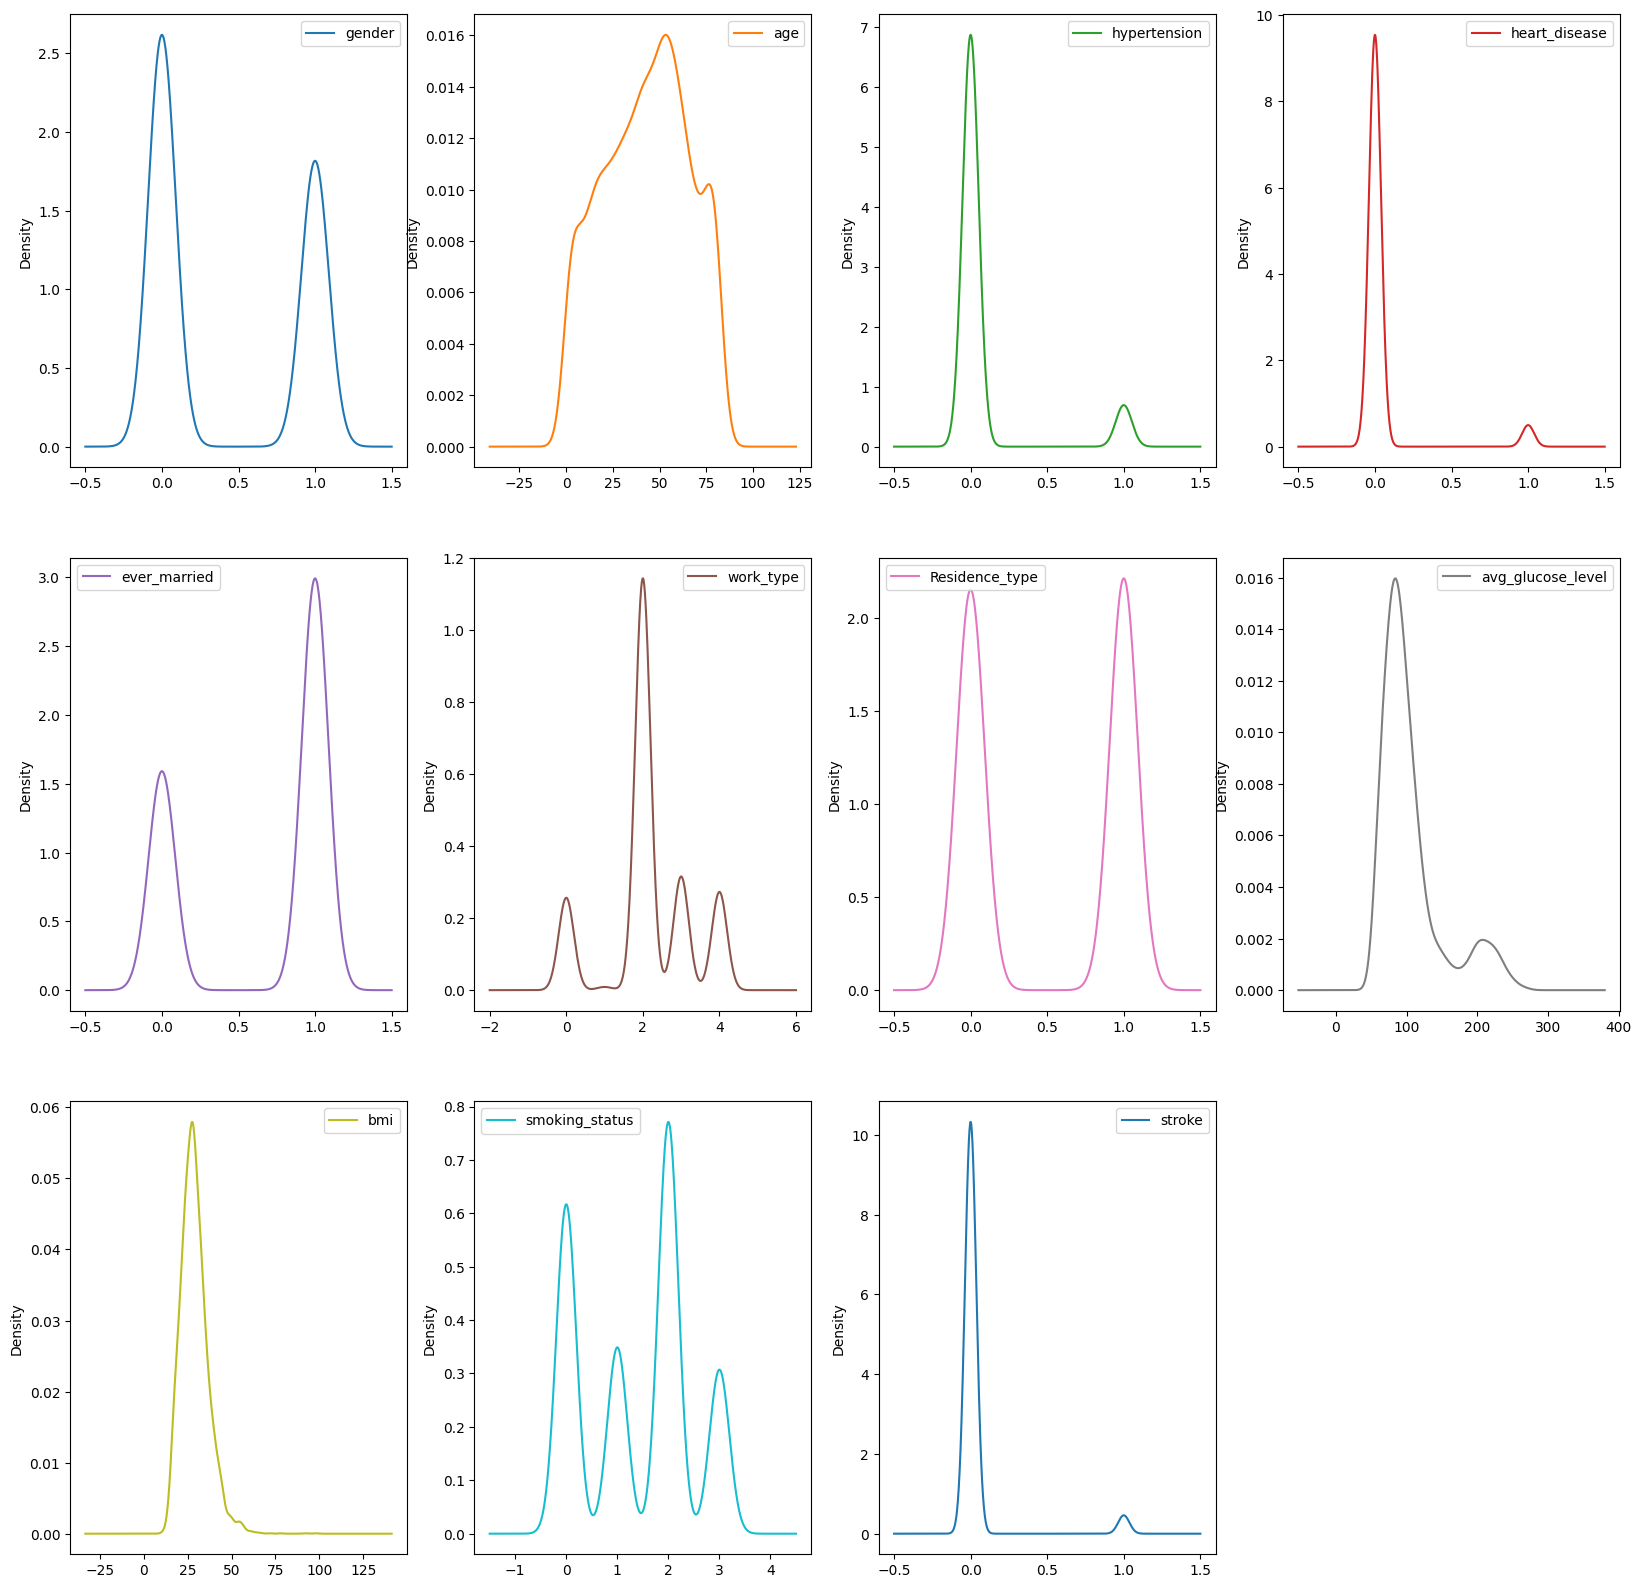

In [81]:
df2.plot(kind='density', subplots=True,  layout=(3,4), sharex=False)
plt.gcf().set_size_inches((20, 20))
plt.show()

gender                  AxesSubplot(0.125,0.653529;0.168478x0.226471)
age                  AxesSubplot(0.327174,0.653529;0.168478x0.226471)
hypertension         AxesSubplot(0.529348,0.653529;0.168478x0.226471)
heart_disease        AxesSubplot(0.731522,0.653529;0.168478x0.226471)
ever_married            AxesSubplot(0.125,0.381765;0.168478x0.226471)
work_type            AxesSubplot(0.327174,0.381765;0.168478x0.226471)
Residence_type       AxesSubplot(0.529348,0.381765;0.168478x0.226471)
avg_glucose_level    AxesSubplot(0.731522,0.381765;0.168478x0.226471)
bmi                         AxesSubplot(0.125,0.11;0.168478x0.226471)
smoking_status           AxesSubplot(0.327174,0.11;0.168478x0.226471)
stroke                   AxesSubplot(0.529348,0.11;0.168478x0.226471)
dtype: object

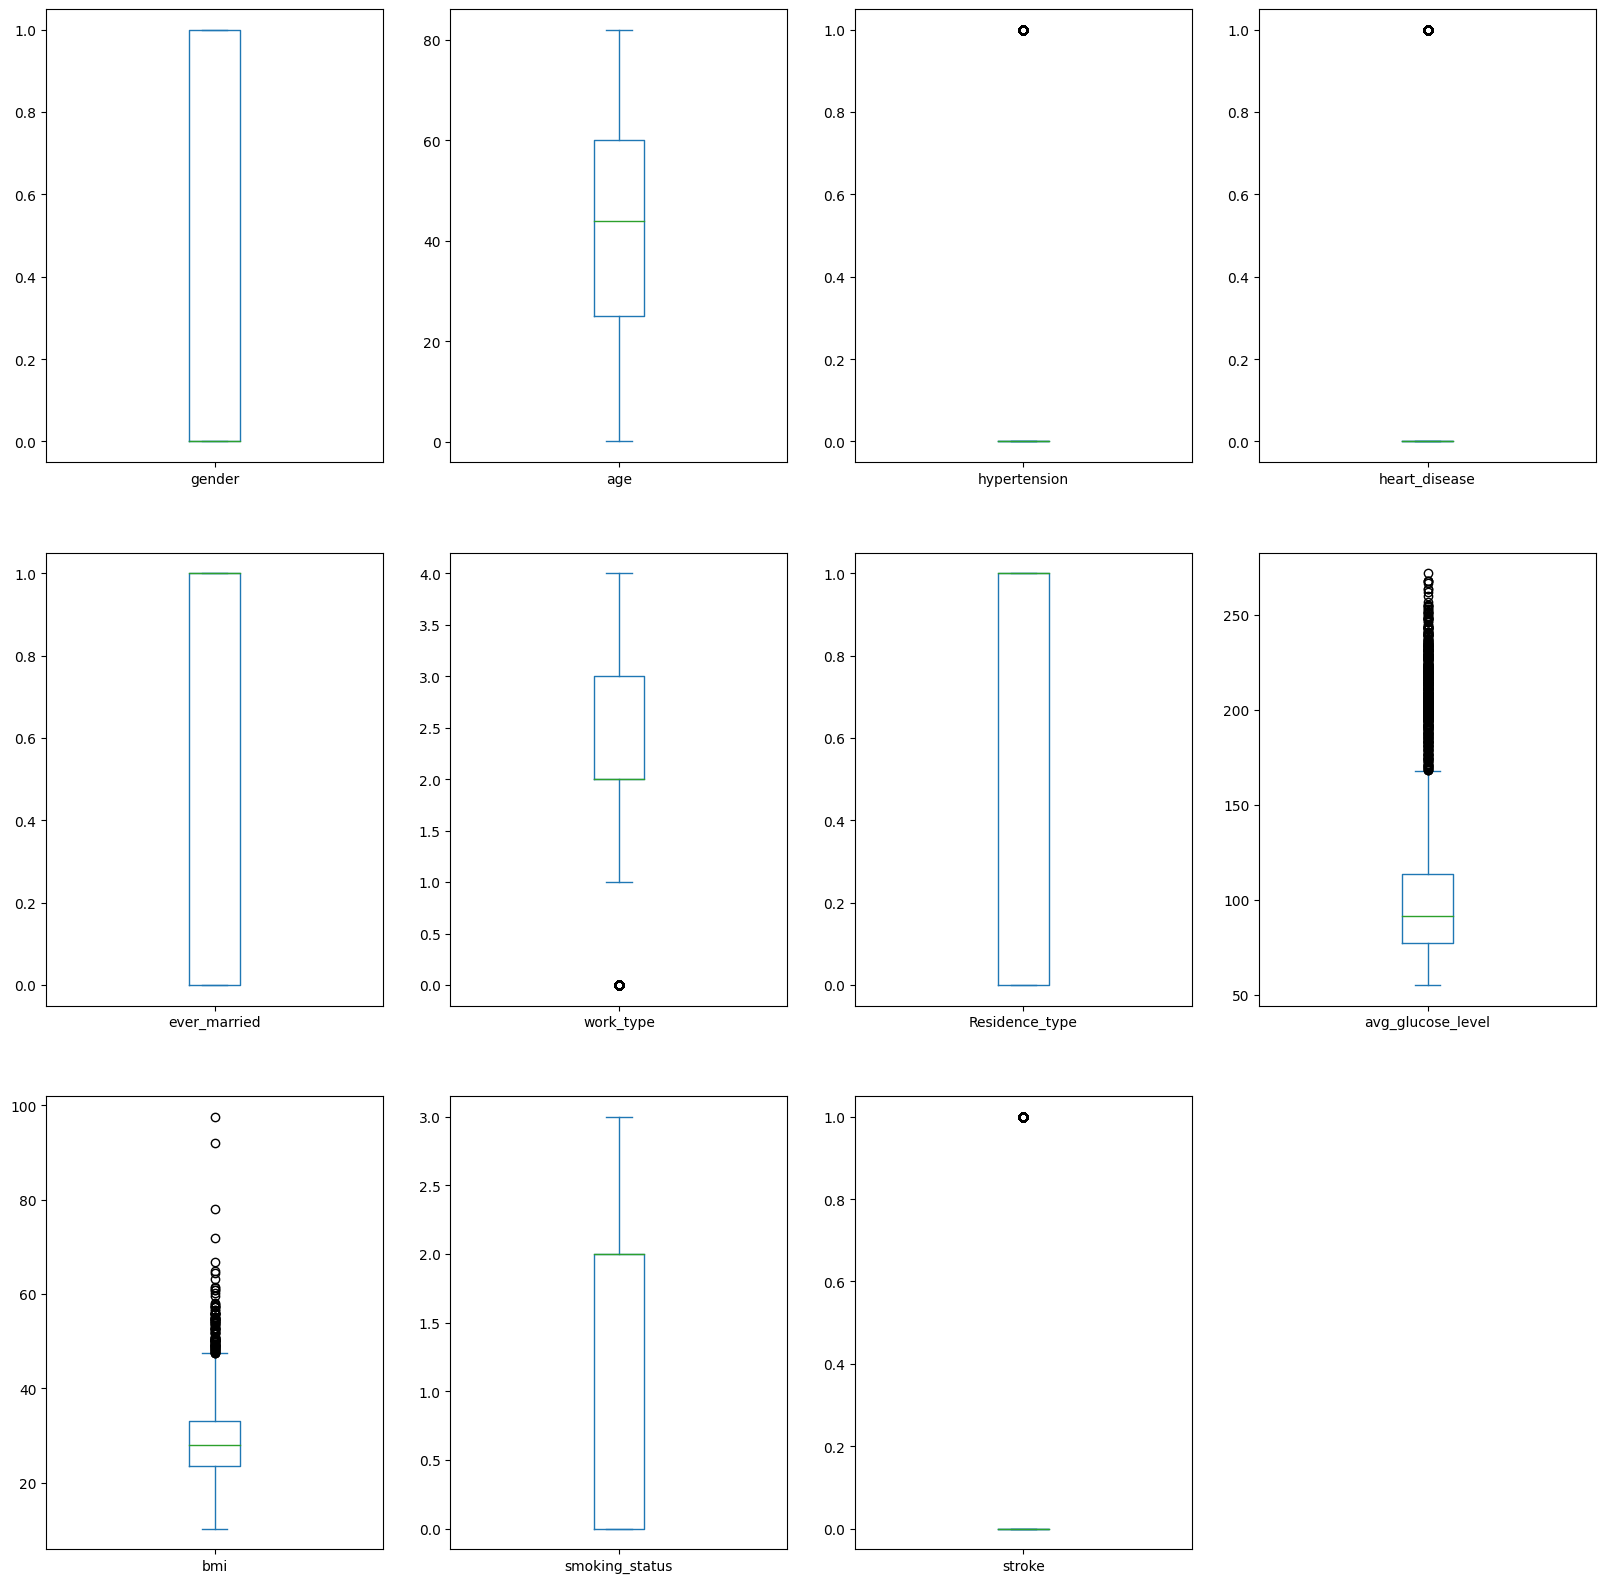

In [82]:
df2.plot(kind='box', subplots=True, layout=(3,4), figsize=(20,20))

## Removal of outliers

In [83]:
outliers = []
def detect_outliers_iqr(data):
    """
    This is a function to remove outliers
    """
    data = np.array(data, dtype=np.float64)
    data = np.sort(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    outliers_mask = (data < lwr_bound) | (data > upr_bound)
    outliers = data[outliers_mask]
    
    return outliers

In [84]:
sample_outliers = detect_outliers_iqr(df['work_type'])
df = df[~df['work_type'].isin(sample_outliers)]
df.shape

(4452, 11)

In [85]:
sample_outliers = detect_outliers_iqr(df['avg_glucose_level'])
df = df[~df['avg_glucose_level'].isin(sample_outliers)]
df.shape

(3920, 11)

In [86]:
sample_outliers = detect_outliers_iqr(df['bmi'])
df = df[~df['bmi'].isin(sample_outliers)]
df.shape

(3833, 11)

In [87]:
sample_outliers = detect_outliers_iqr(df2['work_type'])
df2 = df2[~df2['work_type'].isin(sample_outliers)]
df2.shape

(4263, 11)

In [88]:
sample_outliers = detect_outliers_iqr(df2['avg_glucose_level'])
df2 = df2[~df2['avg_glucose_level'].isin(sample_outliers)]
df2.shape

(3783, 11)

In [89]:
sample_outliers = detect_outliers_iqr(df2['bmi'])
df2 = df2[~df2['bmi'].isin(sample_outliers)]
df2.shape

(3706, 11)

I decided not to remove the outliers in the hypertension and heart_disease features.

The resultant outliers were caused by significant data imbalance in the feature rather than outlires per se.

gender                  AxesSubplot(0.125,0.653529;0.168478x0.226471)
age                  AxesSubplot(0.327174,0.653529;0.168478x0.226471)
hypertension         AxesSubplot(0.529348,0.653529;0.168478x0.226471)
heart_disease        AxesSubplot(0.731522,0.653529;0.168478x0.226471)
ever_married            AxesSubplot(0.125,0.381765;0.168478x0.226471)
work_type            AxesSubplot(0.327174,0.381765;0.168478x0.226471)
Residence_type       AxesSubplot(0.529348,0.381765;0.168478x0.226471)
avg_glucose_level    AxesSubplot(0.731522,0.381765;0.168478x0.226471)
bmi                         AxesSubplot(0.125,0.11;0.168478x0.226471)
smoking_status           AxesSubplot(0.327174,0.11;0.168478x0.226471)
stroke                   AxesSubplot(0.529348,0.11;0.168478x0.226471)
dtype: object

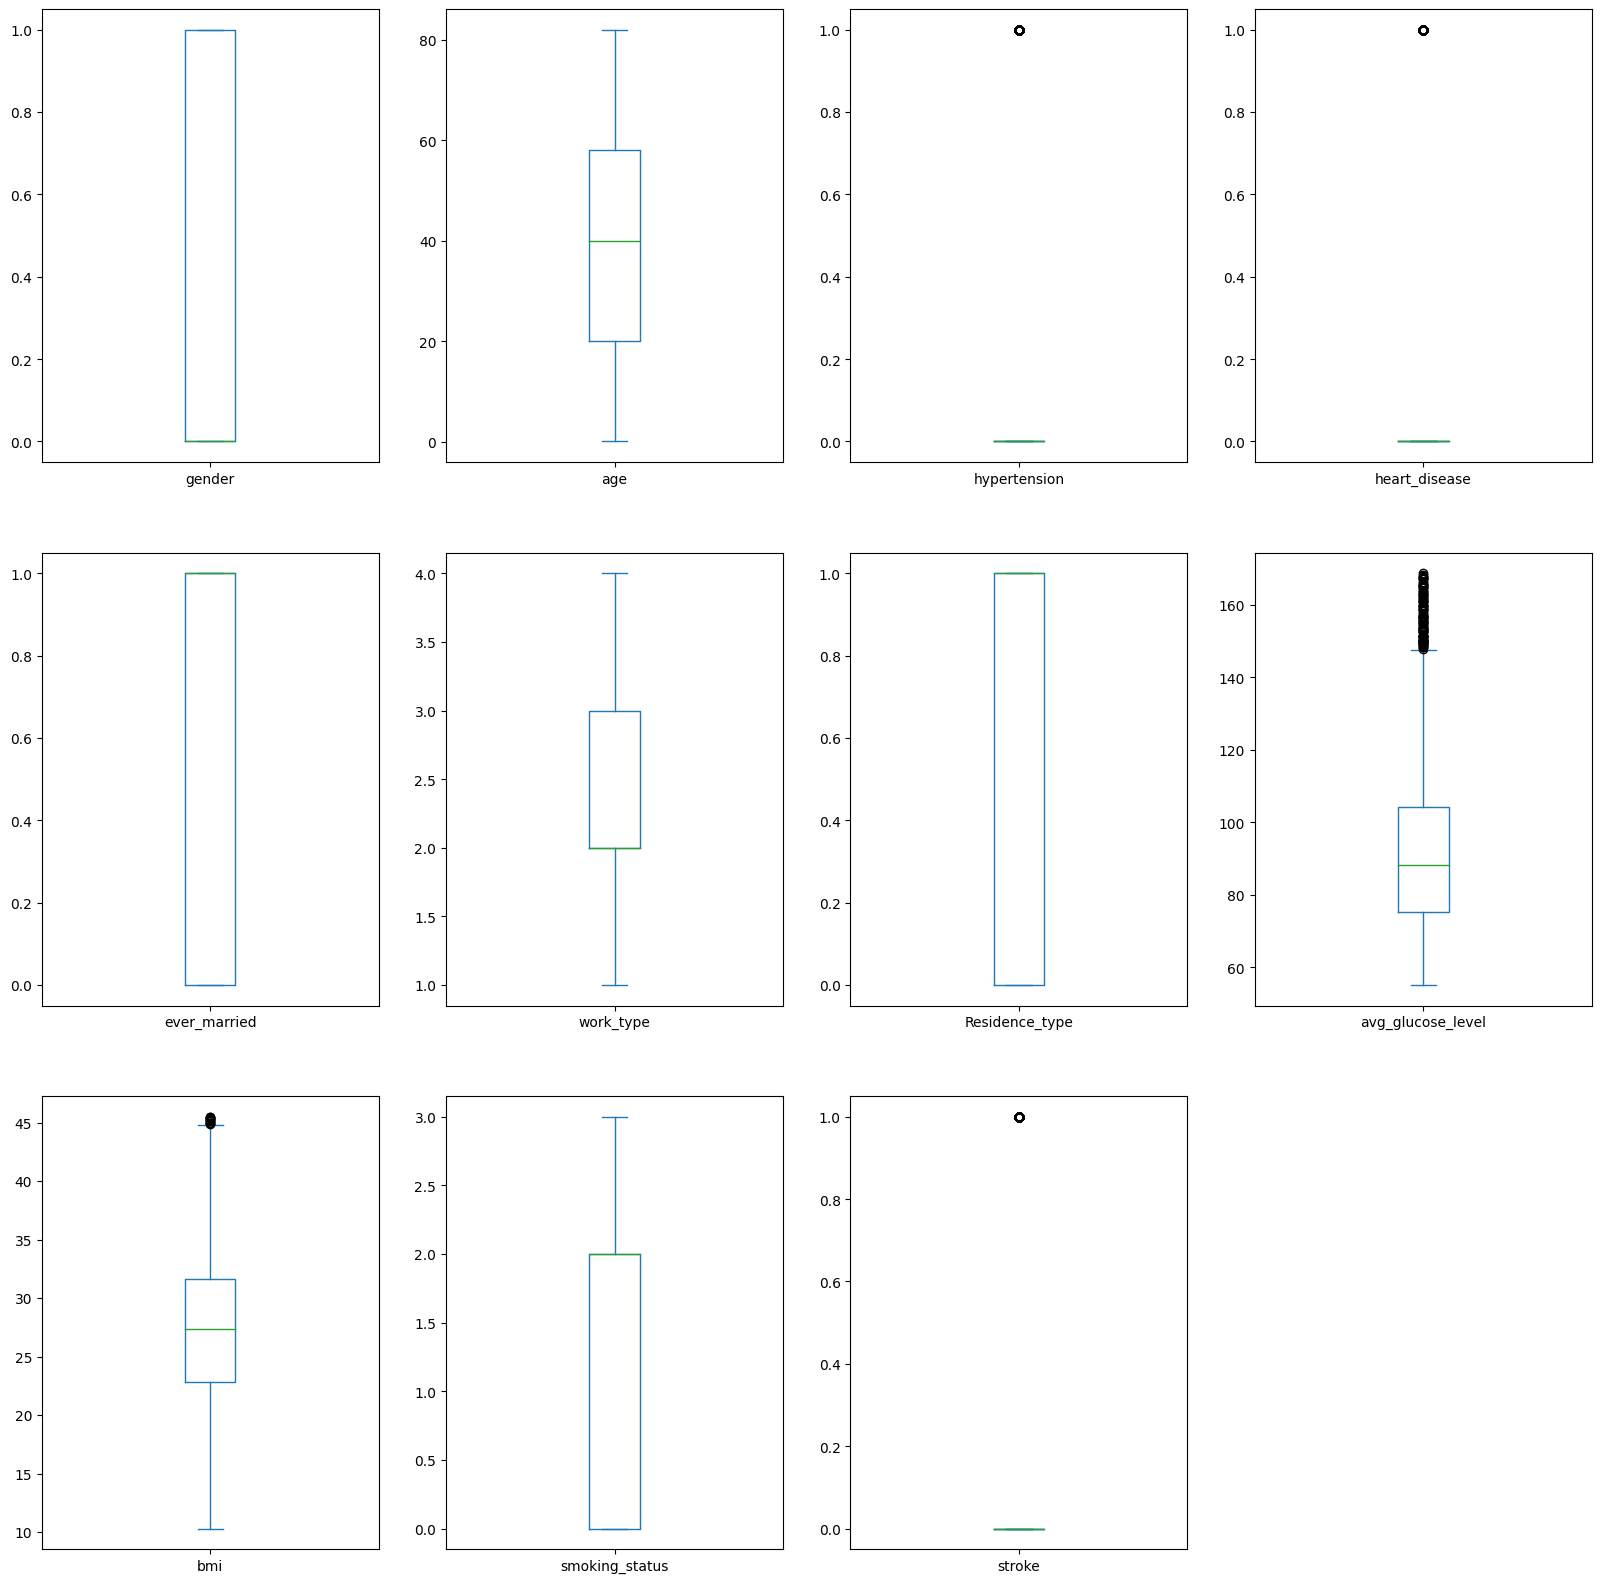

In [90]:
df.plot(kind='box', subplots=True, layout=(3,4), figsize=(20,20))

gender                  AxesSubplot(0.125,0.653529;0.168478x0.226471)
age                  AxesSubplot(0.327174,0.653529;0.168478x0.226471)
hypertension         AxesSubplot(0.529348,0.653529;0.168478x0.226471)
heart_disease        AxesSubplot(0.731522,0.653529;0.168478x0.226471)
ever_married            AxesSubplot(0.125,0.381765;0.168478x0.226471)
work_type            AxesSubplot(0.327174,0.381765;0.168478x0.226471)
Residence_type       AxesSubplot(0.529348,0.381765;0.168478x0.226471)
avg_glucose_level    AxesSubplot(0.731522,0.381765;0.168478x0.226471)
bmi                         AxesSubplot(0.125,0.11;0.168478x0.226471)
smoking_status           AxesSubplot(0.327174,0.11;0.168478x0.226471)
stroke                   AxesSubplot(0.529348,0.11;0.168478x0.226471)
dtype: object

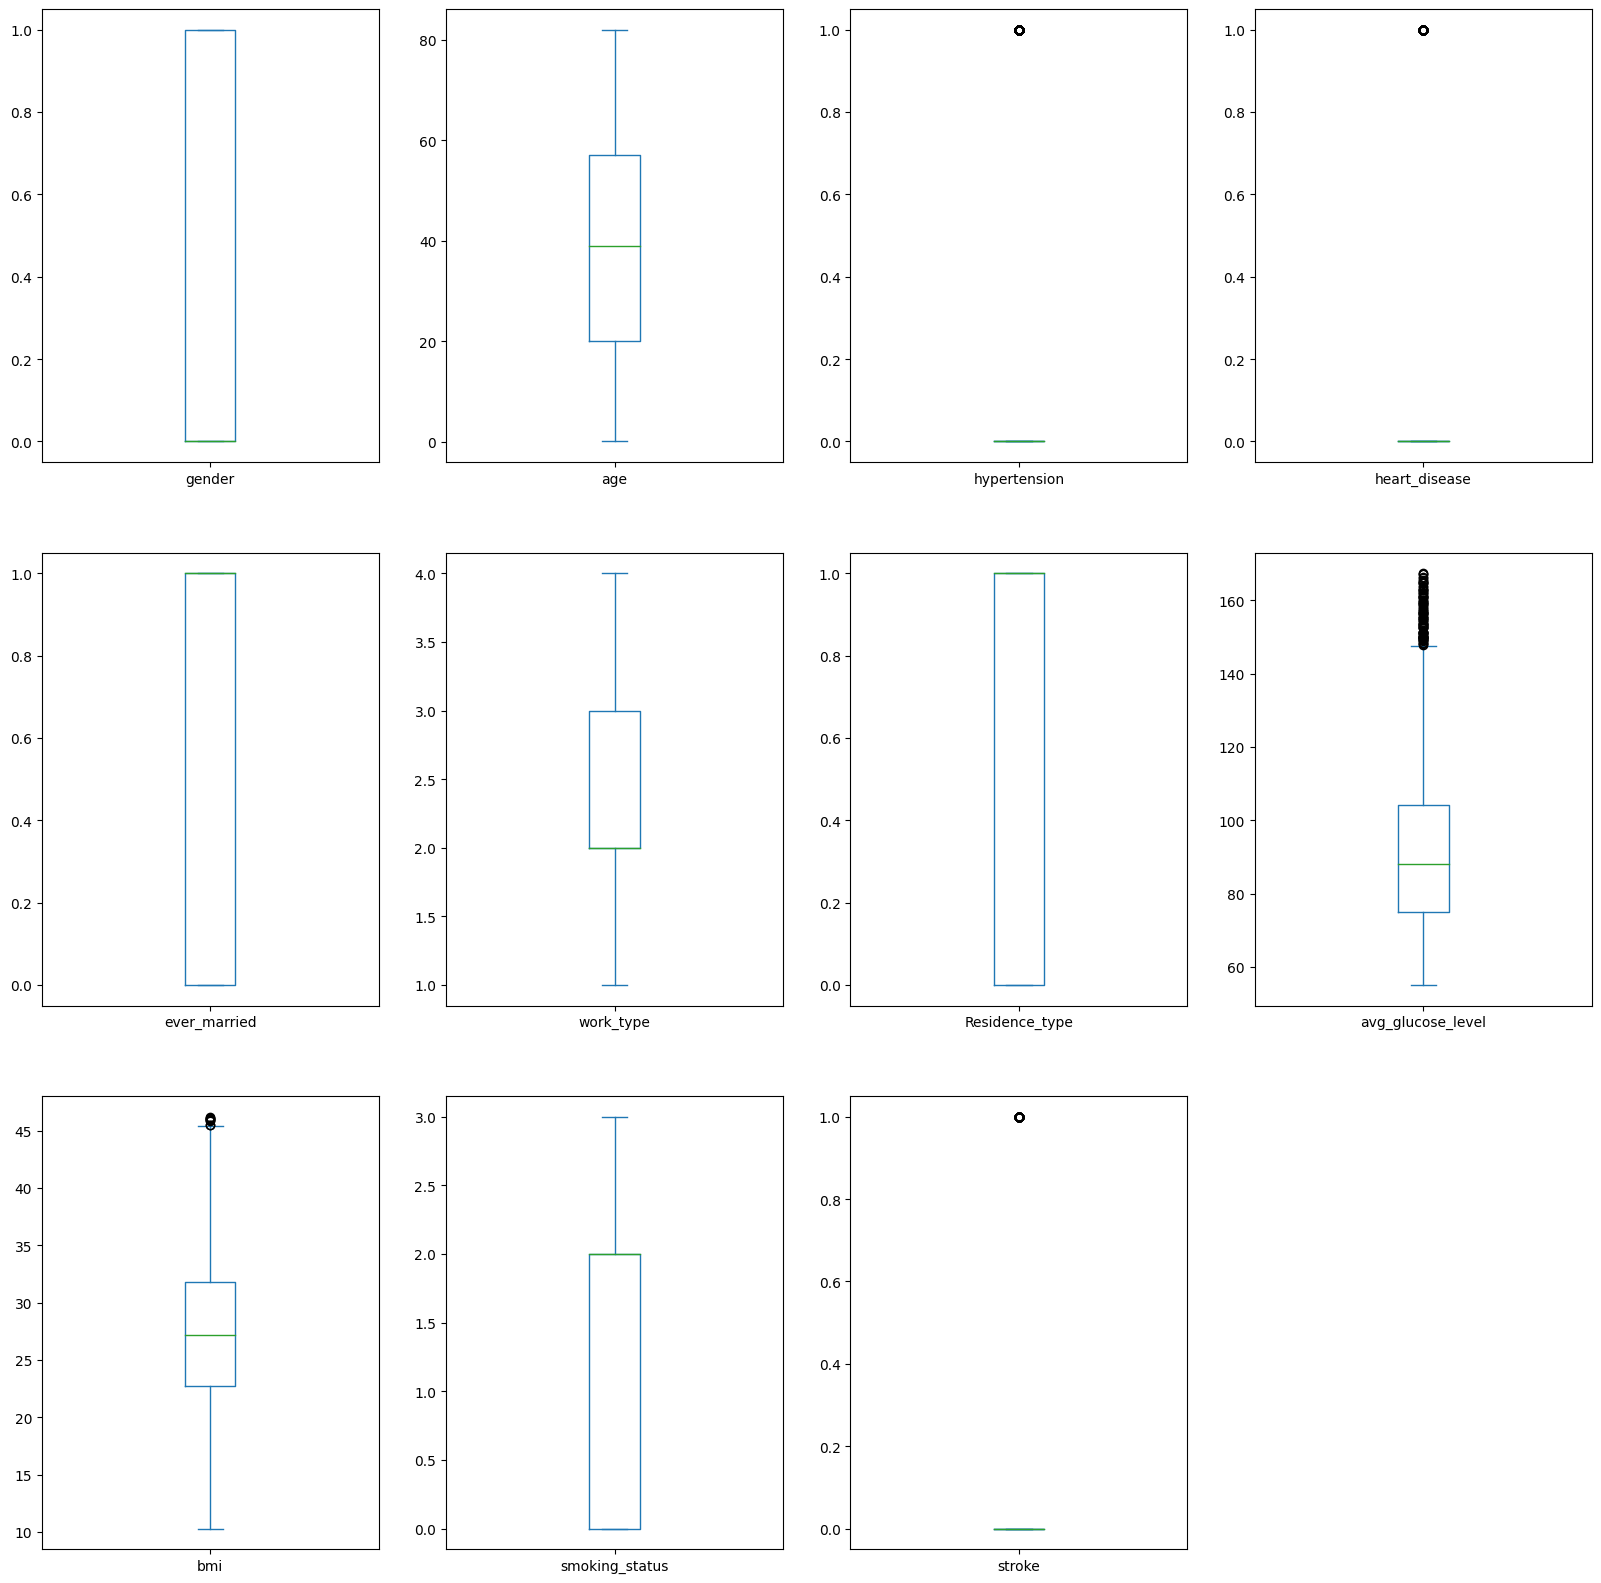

In [91]:
df2.plot(kind='box', subplots=True, layout=(3,4), figsize=(20,20))

## Checking the characteristics of dataset

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3833.0,0.415340,0.492845,0.00,0.00,0.00,1.00,1.00
age,3833.0,39.708313,23.148410,0.08,20.00,40.00,58.00,82.00
hypertension,3833.0,0.072006,0.258532,0.00,0.00,0.00,0.00,1.00
heart_disease,3833.0,0.038351,0.192068,0.00,0.00,0.00,0.00,1.00
ever_married,3833.0,0.596139,0.490734,0.00,0.00,1.00,1.00,1.00
work_type,3833.0,2.518654,0.783260,1.00,2.00,2.00,3.00,4.00
Residence_type,3833.0,0.505870,0.500031,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,3833.0,91.585242,22.662802,55.12,75.19,88.23,104.21,168.68
bmi,3833.0,27.487268,6.572023,10.30,22.80,27.40,31.60,45.50
smoking_status,3833.0,1.306809,1.090286,0.00,0.00,2.00,2.00,3.00


In [93]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3706.0,0.410146,0.491926,0.00,0.000,0.000,1.0000,1.00
age,3706.0,39.401867,23.050806,0.08,20.000,39.000,57.0000,82.00
hypertension,3706.0,0.065839,0.248034,0.00,0.000,0.000,0.0000,1.00
heart_disease,3706.0,0.035348,0.184683,0.00,0.000,0.000,0.0000,1.00
ever_married,3706.0,0.593632,0.491221,0.00,0.000,1.000,1.0000,1.00
work_type,3706.0,2.518349,0.785368,1.00,2.000,2.000,3.0000,4.00
Residence_type,3706.0,0.504857,0.500044,0.00,0.000,1.000,1.0000,1.00
avg_glucose_level,3706.0,91.526074,22.602397,55.12,75.135,88.215,104.1125,167.41
bmi,3706.0,27.516757,6.724823,10.30,22.700,27.150,31.8000,46.20
smoking_status,3706.0,1.307609,1.088689,0.00,0.000,2.000,2.0000,3.00


## Normalizing data set

In [94]:
dfArr = df.values
X = dfArr[:,:-1]
Y = dfArr[:,-1]

scaler = Normalizer().fit(X)
Norm_X = scaler.transform(X)
Norm_X

array([[0.00731541, 0.58523241, 0.        , ..., 0.77484771, 0.23775067,
        0.01463081],
       [0.00946969, 0.70075732, 0.00946969, ..., 0.66373082, 0.2594696 ,
        0.01893939],
       [0.        , 0.57904916, 0.        , ..., 0.79212247, 0.19133798,
        0.01678403],
       ...,
       [0.        , 0.52448293, 0.        , ..., 0.81068226, 0.25900392,
        0.0129502 ],
       [0.        , 0.36765395, 0.        , ..., 0.87176004, 0.3214346 ,
        0.0210088 ],
       [0.00568735, 0.29005507, 0.        , ..., 0.94575016, 0.14559627,
        0.00568735]])

In [95]:
dfArr2 = df2.values
X2 = dfArr2[:,:-1]
Y2 = dfArr2[:,-1]

scaler2 = Normalizer().fit(X2)
Norm_X2 = scaler.transform(X2)
Norm_X2

array([[0.00731541, 0.58523241, 0.        , ..., 0.77484771, 0.23775067,
        0.01463081],
       [0.00946969, 0.70075732, 0.00946969, ..., 0.66373082, 0.2594696 ,
        0.01893939],
       [0.        , 0.57904916, 0.        , ..., 0.79212247, 0.19133798,
        0.01678403],
       ...,
       [0.        , 0.52448293, 0.        , ..., 0.81068226, 0.25900392,
        0.0129502 ],
       [0.        , 0.36765395, 0.        , ..., 0.87176004, 0.3214346 ,
        0.0210088 ],
       [0.00568735, 0.29005507, 0.        , ..., 0.94575016, 0.14559627,
        0.00568735]])

In [96]:
df_trans = pd.DataFrame(Norm_X, columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'])
df_trans

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.007315,0.585232,0.000000,0.007315,0.007315,0.014631,0.000000,0.774848,0.237751,0.014631
1,0.009470,0.700757,0.009470,0.009470,0.009470,0.018939,0.000000,0.663731,0.259470,0.018939
2,0.000000,0.579049,0.000000,0.000000,0.000000,0.016784,0.008392,0.792122,0.191338,0.016784
3,0.000000,0.587816,0.000000,0.000000,0.009963,0.019926,0.000000,0.758682,0.279960,0.000000
4,0.000000,0.775895,0.000000,0.000000,0.009947,0.019895,0.009947,0.582618,0.240726,0.000000
...,...,...,...,...,...,...,...,...,...,...
3828,0.000000,0.123078,0.000000,0.000000,0.000000,0.037870,0.000000,0.975914,0.176096,0.000000
3829,0.000000,0.670999,0.008387,0.000000,0.008387,0.016775,0.008387,0.702452,0.235688,0.016775
3830,0.000000,0.524483,0.000000,0.000000,0.006475,0.019425,0.006475,0.810682,0.259004,0.012950
3831,0.000000,0.367654,0.000000,0.000000,0.010504,0.031513,0.000000,0.871760,0.321435,0.021009


In [97]:
df_trans['stroke'] = Y
df_trans

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.007315,0.585232,0.000000,0.007315,0.007315,0.014631,0.000000,0.774848,0.237751,0.014631,1.0
1,0.009470,0.700757,0.009470,0.009470,0.009470,0.018939,0.000000,0.663731,0.259470,0.018939,1.0
2,0.000000,0.579049,0.000000,0.000000,0.000000,0.016784,0.008392,0.792122,0.191338,0.016784,1.0
3,0.000000,0.587816,0.000000,0.000000,0.009963,0.019926,0.000000,0.758682,0.279960,0.000000,1.0
4,0.000000,0.775895,0.000000,0.000000,0.009947,0.019895,0.009947,0.582618,0.240726,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3828,0.000000,0.123078,0.000000,0.000000,0.000000,0.037870,0.000000,0.975914,0.176096,0.000000,0.0
3829,0.000000,0.670999,0.008387,0.000000,0.008387,0.016775,0.008387,0.702452,0.235688,0.016775,0.0
3830,0.000000,0.524483,0.000000,0.000000,0.006475,0.019425,0.006475,0.810682,0.259004,0.012950,0.0
3831,0.000000,0.367654,0.000000,0.000000,0.010504,0.031513,0.000000,0.871760,0.321435,0.021009,0.0


In [98]:
df_trans2 = pd.DataFrame(Norm_X2, columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'])
df_trans2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.007315,0.585232,0.000000,0.007315,0.007315,0.014631,0.000000,0.774848,0.237751,0.014631
1,0.009470,0.700757,0.009470,0.009470,0.009470,0.018939,0.000000,0.663731,0.259470,0.018939
2,0.000000,0.579049,0.000000,0.000000,0.000000,0.016784,0.008392,0.792122,0.191338,0.016784
3,0.000000,0.775895,0.000000,0.000000,0.009947,0.019895,0.009947,0.582618,0.240726,0.000000
4,0.000000,0.686488,0.008475,0.000000,0.008475,0.016950,0.000000,0.681657,0.251712,0.016950
...,...,...,...,...,...,...,...,...,...,...
3701,0.000000,0.575729,0.000000,0.000000,0.010101,0.020201,0.000000,0.787133,0.219181,0.020201
3702,0.000000,0.123078,0.000000,0.000000,0.000000,0.037870,0.000000,0.975914,0.176096,0.000000
3703,0.000000,0.524483,0.000000,0.000000,0.006475,0.019425,0.006475,0.810682,0.259004,0.012950
3704,0.000000,0.367654,0.000000,0.000000,0.010504,0.031513,0.000000,0.871760,0.321435,0.021009


In [99]:
df_trans2['stroke'] = Y2
df_trans2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.007315,0.585232,0.000000,0.007315,0.007315,0.014631,0.000000,0.774848,0.237751,0.014631,1.0
1,0.009470,0.700757,0.009470,0.009470,0.009470,0.018939,0.000000,0.663731,0.259470,0.018939,1.0
2,0.000000,0.579049,0.000000,0.000000,0.000000,0.016784,0.008392,0.792122,0.191338,0.016784,1.0
3,0.000000,0.775895,0.000000,0.000000,0.009947,0.019895,0.009947,0.582618,0.240726,0.000000,1.0
4,0.000000,0.686488,0.008475,0.000000,0.008475,0.016950,0.000000,0.681657,0.251712,0.016950,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3701,0.000000,0.575729,0.000000,0.000000,0.010101,0.020201,0.000000,0.787133,0.219181,0.020201,0.0
3702,0.000000,0.123078,0.000000,0.000000,0.000000,0.037870,0.000000,0.975914,0.176096,0.000000,0.0
3703,0.000000,0.524483,0.000000,0.000000,0.006475,0.019425,0.006475,0.810682,0.259004,0.012950,0.0
3704,0.000000,0.367654,0.000000,0.000000,0.010504,0.031513,0.000000,0.871760,0.321435,0.021009,0.0


In [100]:
df_trans.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3833.0,0.004060,0.005005,0.000000,0.000000,0.000000,0.009049,0.017113
age,3833.0,0.367692,0.199559,0.000570,0.206143,0.378256,0.531199,0.804054
hypertension,3833.0,0.000634,0.002308,0.000000,0.000000,0.000000,0.000000,0.013409
heart_disease,3833.0,0.000327,0.001658,0.000000,0.000000,0.000000,0.000000,0.014370
ever_married,3833.0,0.005511,0.004707,0.000000,0.000000,0.007687,0.009460,0.014999
work_type,3833.0,0.024987,0.010864,0.006134,0.017854,0.021479,0.028042,0.068676
Residence_type,3833.0,0.004975,0.005134,0.000000,0.000000,0.005938,0.009617,0.017113
avg_glucose_level,3833.0,0.859327,0.096357,0.547286,0.795124,0.875834,0.939934,0.996437
bmi,3833.0,0.265996,0.073073,0.080020,0.214681,0.257663,0.311779,0.571344
smoking_status,3833.0,0.012504,0.010933,0.000000,0.000000,0.012617,0.020679,0.045844


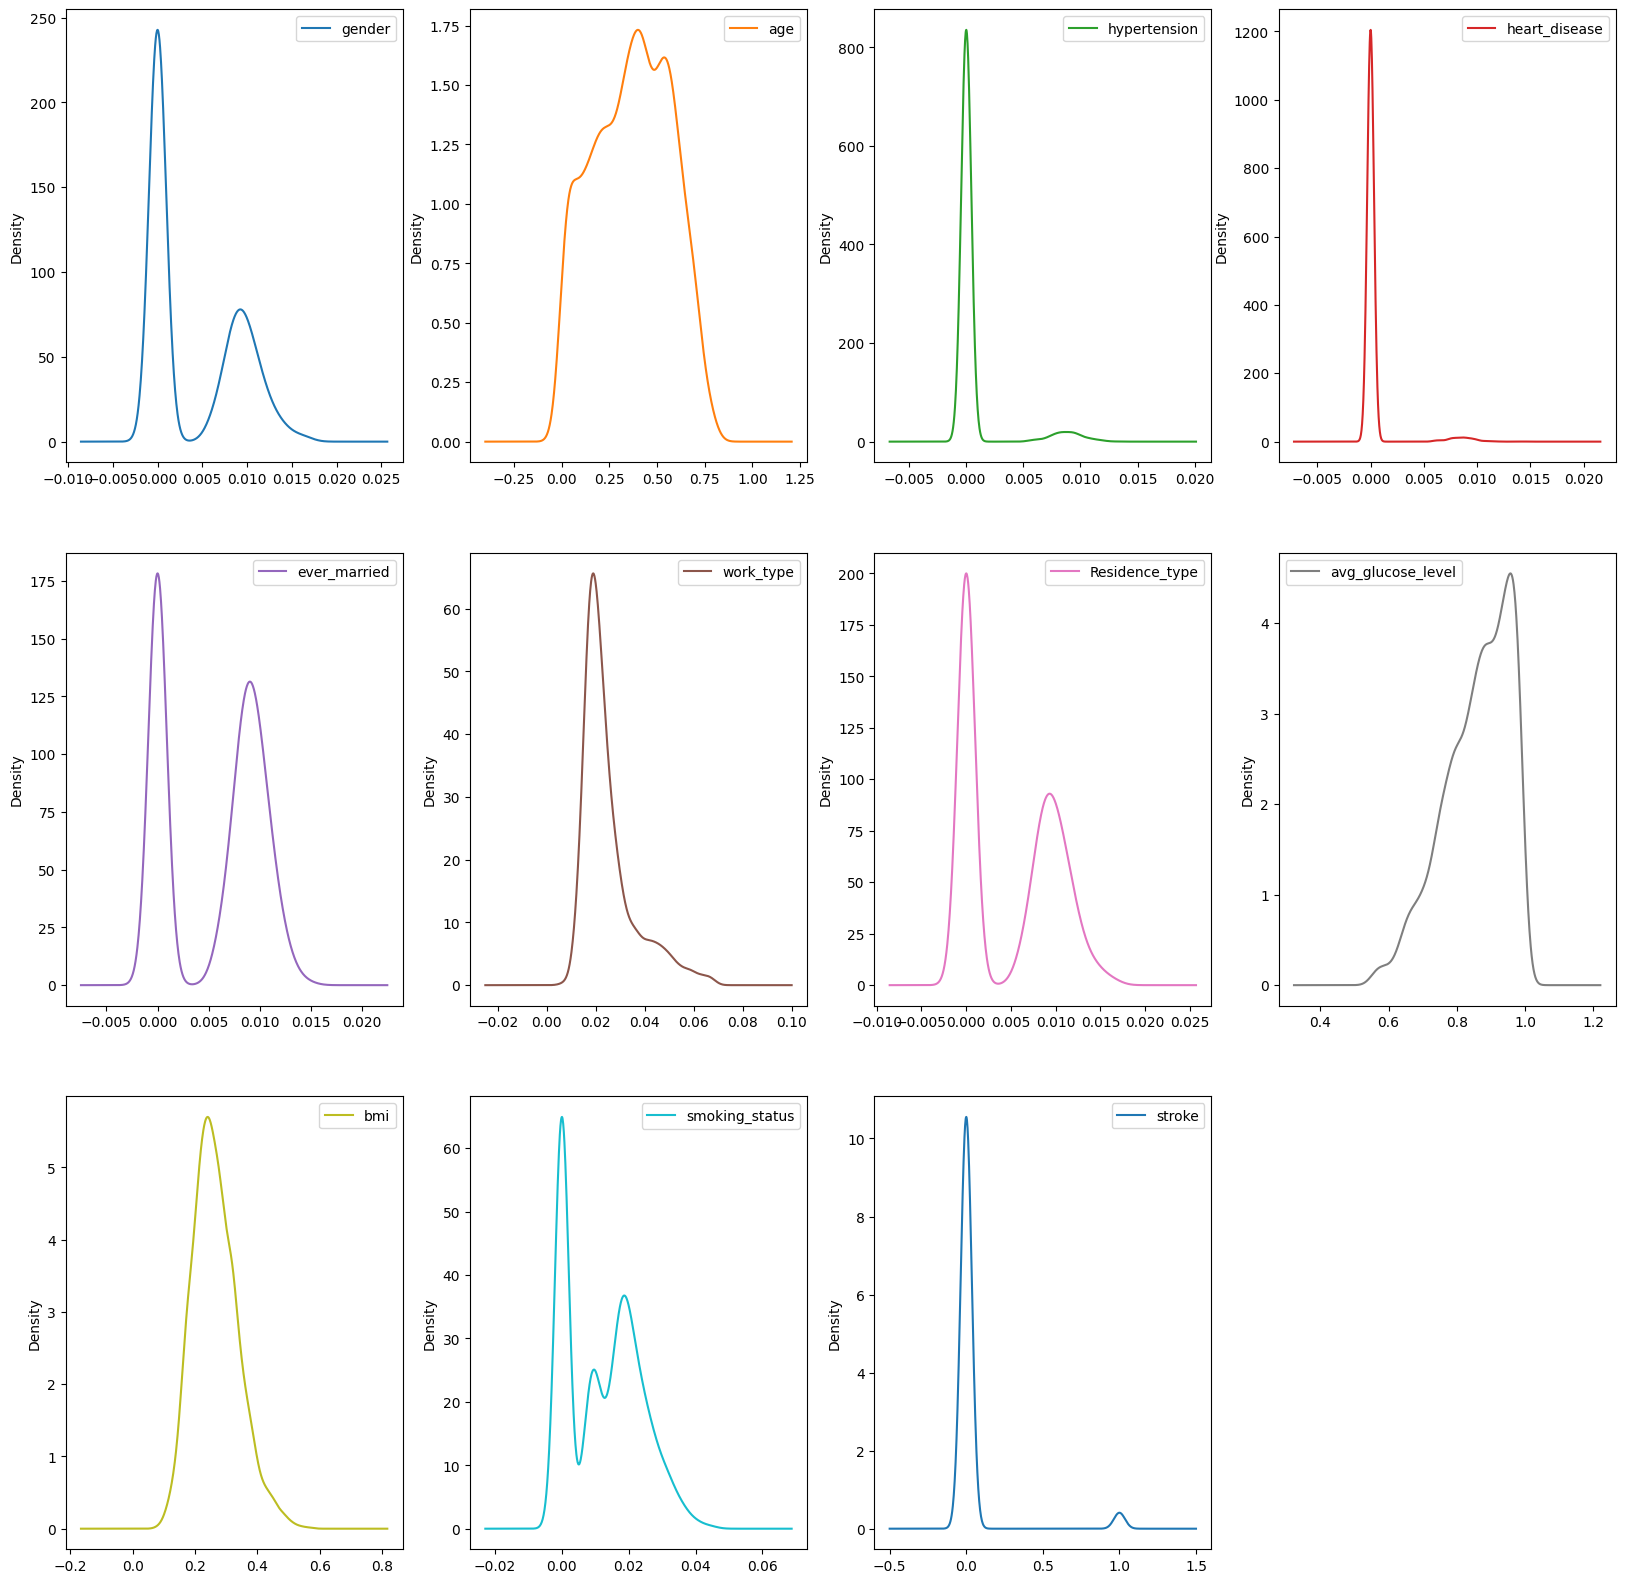

In [103]:
df_trans.plot(kind='density', subplots=True,  layout=(3,4), sharex=False)
plt.gcf().set_size_inches((20, 20))
plt.show()

In [104]:
df_trans2.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3706.0,0.004017,0.005005,0.000000,0.000000,0.000000,0.009031,0.017113
age,3706.0,0.365477,0.198931,0.000570,0.204517,0.376064,0.528854,0.804054
hypertension,3706.0,0.000581,0.002221,0.000000,0.000000,0.000000,0.000000,0.013409
heart_disease,3706.0,0.000299,0.001583,0.000000,0.000000,0.000000,0.000000,0.014370
ever_married,3706.0,0.005495,0.004718,0.000000,0.000000,0.007674,0.009470,0.014999
work_type,3706.0,0.025029,0.010910,0.006134,0.017869,0.021479,0.028068,0.068676
Residence_type,3706.0,0.004978,0.005147,0.000000,0.000000,0.005958,0.009626,0.017113
avg_glucose_level,3706.0,0.860187,0.096068,0.547286,0.795914,0.876190,0.940692,0.996437
bmi,3706.0,0.266593,0.073955,0.080020,0.214075,0.258340,0.313543,0.571344
smoking_status,3706.0,0.012532,0.010938,0.000000,0.000000,0.012972,0.020688,0.045844


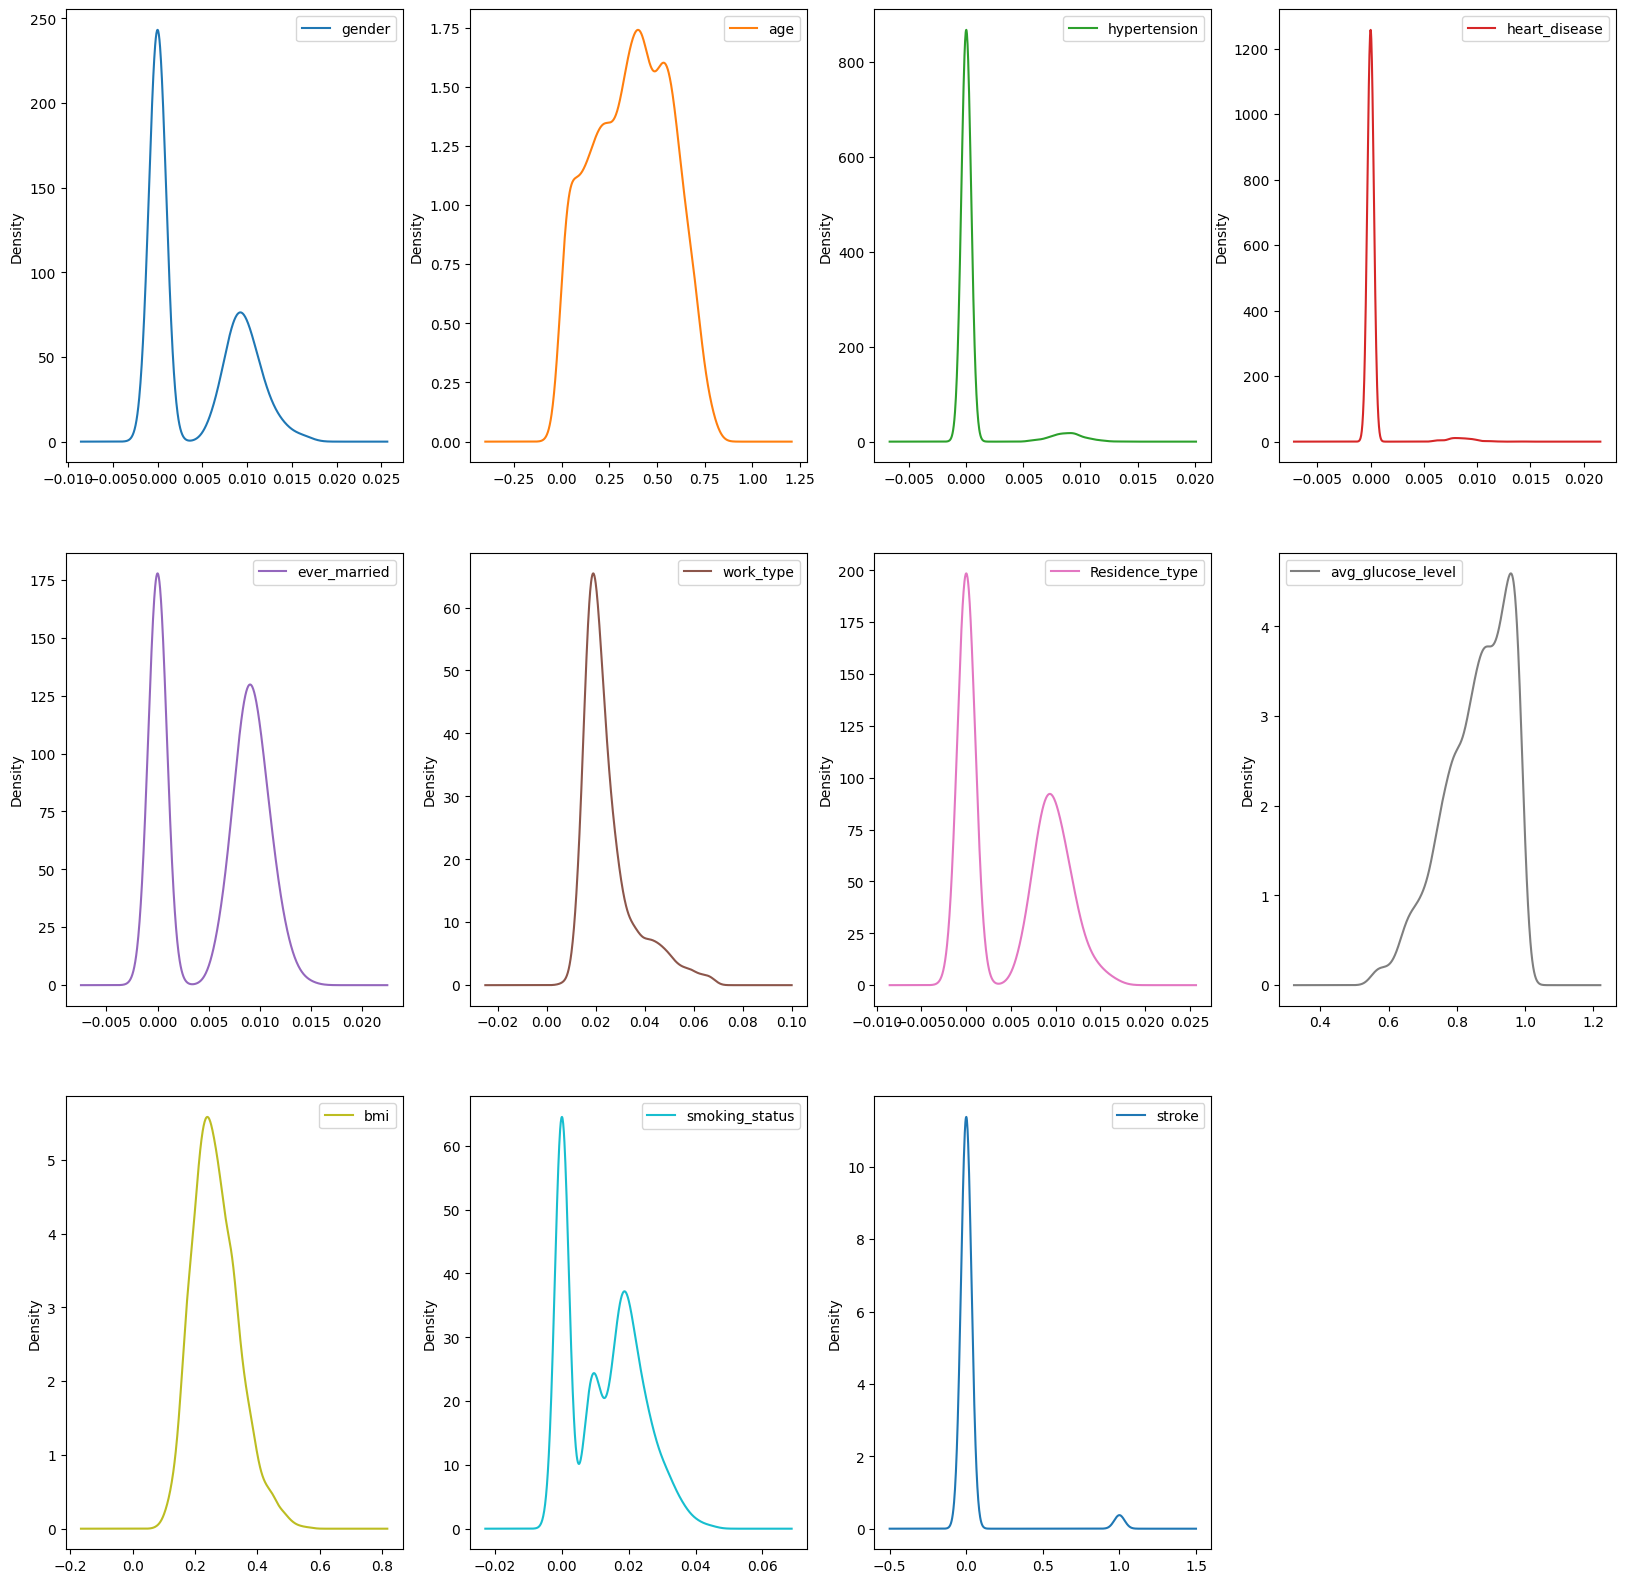

In [105]:
df_trans2.plot(kind='density', subplots=True,  layout=(3,4), sharex=False)
plt.gcf().set_size_inches((20, 20))
plt.show()

## Feature Selection

In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def autofeat1(data, t_size, seed):
    """
    A function to automatically select the maximum number of features that provides
    the highest score and also return the number of features, maximum score and selected
    features
    """
    
    def num_of_feat(data):
        """This function return possible number of features that can be selected"""
        features = []
        for i in range(1, len(data.columns) - 1):
            features.append(i)
        return features
    
    def feaSelector(X, Y, numFeature):
        """This function helps to determine features ranking"""
        model = LogisticRegression()
        rfe = RFE(model, n_features_to_select=numFeature)
        fit = rfe.fit(X, Y)
        return(list(fit.ranking_))
    
    def feature_selector(data, rankList):
        """This helps to return the selcted features' data"""
        cols = data.columns
        cols = list(cols)[0:len(cols)-1]
        selCols = []
        for col, rank in zip(cols,rankList):
            if rank == 1:
                selCols.append(col)
        x = data[selCols].values
        return x
    
    def column_selector(data, rankList):
        """This helps to return the selected features/columns"""
        cols = data.columns
        cols = list(cols)[0:len(cols)-1]
        selCols = []
        for col, rank in zip(cols,rankList):
            if rank == 1:
                selCols.append(col)
        return selCols
    
    def modeller(X, Y, numFeature, seed, t_size):
        """This helps to deternmine each set of features score"""
        selectedCols = feaSelector(X, Y, numFeature)
        x = feature_selector(data, selectedCols)
        test_size = t_size
        seed = seed
        xTrain, xTest, yTrain, yTest = train_test_split(x, Y, test_size = t_size, random_state=seed)
        model = LogisticRegression()
        model.fit(xTrain, yTrain)
        modelScore = model.score(xTest, yTest)
        return modelScore
    
    X = data.values[:,:-1]
    Y = data.values[:,-1]
    
    numFeature = num_of_feat(data)
    score_dic = {i: modeller(X, Y, int(i), seed, t_size) for i in numFeature}
    max_score = max(score_dic.values())
    max_key = [key for key, value in score_dic.items() if value == max_score][0]
    max_rank = feaSelector(X, Y, max_key)
    cols = column_selector(df2, max_rank)
    
    return max_key, max_score, cols

In [107]:
#Another way of writing above function


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def autofeat2(data, t_size, seed):
    """
    A function to automatically select the maximum number of features that provides
    the highest score and also return the number of features, maximum score and selected
    features
    """
    
    def get_feature_indices(data):
        """This function return possible number of features that can be selected"""
        return list(range(1, len(data.columns) - 1))
    
    def feaSelector(X, Y, numFeature):
        """This function helps to determine features ranking"""
        model = LogisticRegression()
        rfe = RFE(model, n_features_to_select=numFeature)
        fit = rfe.fit(X, Y)
        return(list(fit.ranking_))
    
    def feature_selector(data, rankList):
        """This helps to return the selcted features' data"""
        selected_columns = [col for col, rank in zip(data.columns[:-1], rankList) if rank == 1]
        selected_data = data[selected_columns].values
        return selected_data
    
    def column_selector(data, rankList):
        """This helps to return the selected features/columns"""
        selected_columns = [col for col, rank in zip(data.columns[:-1], rankList) if rank == 1]
        return selected_columns
    
    def modeller(X, Y, num_feature, seed, test_size):
        """This helps to deternmine each set of features score"""
        selected_cols = feaSelector(X, Y, num_feature)
        selected_data = feature_selector(data, selected_cols)
        x_train, x_test, y_train, y_test = train_test_split(selected_data, Y, test_size=test_size, random_state=seed)
        model = LogisticRegression()
        model.fit(x_train, y_train)
        model_score = model.score(x_test, y_test)
        return model_score
    
    X = data.values[:, :-1]
    Y = data.values[:, -1]
    
    num_features = get_feature_indices(data)
    score_dict = {i: modeller(X, Y, int(i), seed, t_size) for i in num_features}
    max_score = max(score_dict.values())
    max_key = [key for key, value in score_dict.items() if value == max_score][0]
    max_rank = feaSelector(X, Y, max_key)
    cols = column_selector(df2, max_rank)
    
    
    return max_key, max_score, cols

In [108]:
autofeat1(df_trans, 0.2, 3) #using seed = 3

(1, 0.9713168187744459, ['age'])

In [109]:
autofeat1(df_trans2, 0.2, 3) #using seed = 3

(1, 0.9743935309973046, ['age'])

In [110]:
autofeat1(df_trans, 0.2, 7) #using seed = 7

(1, 0.9687092568448501, ['age'])

In [111]:
autofeat1(df_trans2, 0.2, 7) #using seed = 7

(1, 0.9797843665768194, ['age'])

In [112]:
autofeat1(df_trans, 0.2, 10) #using seed = 10

(1, 0.9582790091264668, ['age'])

In [113]:
autofeat1(df_trans2, 0.2, 10) #using seed = 10

(1, 0.9582210242587601, ['age'])

In [114]:
autofeat1(df_trans, 0.2, 15) #using seed = 15

(1, 0.9647979139504563, ['age'])

In [115]:
autofeat1(df_trans2, 0.2, 15) #using seed = 15

(1, 0.9757412398921833, ['age'])

In [116]:
autofeat1(df_trans, 0.2, 30) #using seed = 30

(1, 0.9765319426336375, ['age'])

In [117]:
autofeat1(df_trans2, 0.2, 30) #using seed = 30

(1, 0.9811320754716981, ['age'])

### This autofeat function kept returning one column, age, even after varying random state.

In [118]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def autoscore(data, t_size, seed, numFeature):
    """
    A function to automatically return the score and selected features/columns
    """
    
    def feaSelector(X, Y, numFeature):
        """This function helps to determine features ranking"""
        model = LogisticRegression()
        rfe = RFE(model, n_features_to_select=numFeature)
        fit = rfe.fit(X, Y)
        return(list(fit.ranking_))
    
    def feature_selector(data, rankList):
        """This helps to return the selcted features' data"""
        cols = data.columns
        cols = list(cols)[0:len(cols)-1]
        selCols = []
        for col, rank in zip(cols,rankList):
            if rank == 1:
                selCols.append(col)
        x = data[selCols].values
        return x
    
    def column_selector(data, rankList):
        """This helps to return the selected features/columns"""
        cols = data.columns
        cols = list(cols)[0:len(cols)-1]
        selCols = []
        for col, rank in zip(cols,rankList):
            if rank == 1:
                selCols.append(col)
        return selCols
    
    def modeller(X, Y, numFeature, t_size, seed):
        """This helps to deternmine the score"""
        selectedCols = feaSelector(X, Y, numFeature)
        x = feature_selector(data, selectedCols)
        test_size = t_size
        seed = seed
        xTrain, xTest, yTrain, yTest = train_test_split(x, Y, test_size = t_size, random_state=seed)
        model = LogisticRegression()
        model.fit(xTrain, yTrain)
        modelScore = model.score(xTest, yTest)
        return modelScore
    
    X = data.values[:,:-1]
    Y = data.values[:,-1]
    
    selectedCols = feaSelector(X, Y, numFeature)
    score = modeller(X, Y, numFeature, t_size, seed)
    cols = column_selector(df2, selectedCols)
    
    return score, cols

In [119]:
autoscore(df_trans, 0.2, 30, 5)

(0.9765319426336375,
 ['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status'])

In [120]:
autoscore(df_trans2, 0.2, 30, 5)

(0.9811320754716981,
 ['age', 'hypertension', 'work_type', 'avg_glucose_level', 'bmi'])

In [121]:
autoscore(df_trans, 0.2, 30, 6)

(0.9765319426336375,
 ['age',
  'hypertension',
  'work_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status'])

In [122]:
autoscore(df_trans2, 0.2, 30, 6)

(0.9811320754716981,
 ['age',
  'hypertension',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi'])

In [123]:
autoscore(df_trans, 0.2, 30, 4)

(0.9765319426336375, ['age', 'work_type', 'avg_glucose_level', 'bmi'])

In [124]:
autoscore(df_trans2, 0.2, 30, 4)

(0.9811320754716981, ['age', 'work_type', 'avg_glucose_level', 'bmi'])

This autoscore function kept returning the same model score varing number of features from minimum to maximum

### I discovered that feature selection was not significant due to the data size.

In [125]:
#getting all features rank for the data with filled null values
data = df_trans
X = data.values[:,:-1]
Y = data.values[:,-1]

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, Y)
print(list(fit.ranking_))

[10, 1, 6, 9, 7, 4, 8, 3, 2, 5]


### This is arranged in descending order of rank
Age, bmi, avg_glucose_level, work_type, smoking_status, hypertension, Residence_type, ever_married,
heart_disease, gender.

## Top 5 = Age, bmi, avg_glucose_level, work_type, smoking_status

In [126]:
#getting all features rank for the data with dropped null values
data = df_trans2
X2 = data.values[:,:-1]
Y2 = data.values[:,-1]

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X2, Y2)
print(list(fit.ranking_))

[8, 1, 5, 7, 9, 4, 6, 3, 2, 10]


### This is arranged in descending order of rank
Age, bmi, avg_glucose_level, work_type, hypertension, Residence_type, heart_disease, gender, ever_married, smoking_status
## Top 5 = Age, bmi, avg_glucose_level, work_type, hypertension

I decided to use the the tope 4 features in both the data with filled null values and data with dropped null values. I also took the 5th feature from both. Hence, the six selected features that will be used to train the models are: Age, bmi, avg_glucose_level, work_type, hypertension, smoking_status

## Training and checking accuracy of Models

In [127]:
# Using Train-Test Split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def test_split_pred(data, test_size, seed, new_data):
    """A function that uses Train-Test Split method to train models and predict target"""
    X = data.iloc[:, :-1].values  # Features of the original data
    y = data.iloc[:, -1].values   # Target variable of the original data

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    model = LogisticRegression()
    
    model.fit(X_train, y_train)  # Training the model on our training data
    result = model.score(X_test, y_test)
    
    # Use new_data for predictions, and not the original data
    new_data_features = new_data.iloc[:, :-1].values
    predictions = model.predict(new_data_features)
    
    # Assuming that the target variable is the last column of new_data
    accuracy = accuracy_score(new_data.iloc[:, -1].values, predictions)
    
    return result, accuracy, predictions


In [128]:
# Using K-fold Cross validation
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def kfold_train_pred(data, numFolds, seed, new_data):
    """Using k-fold for training"""
    dataArr = data.values
    X = dataArr[:, 0:-1]
    y = dataArr[:, -1]

    kfold = KFold(n_splits=numFolds, shuffle=True, random_state=seed)
    model = LogisticRegression()

    results = cross_val_score(model, X, y, cv=kfold)
    
    # Use new_data for predictions, and not the original data
    predictions = cross_val_predict(model, new_data.values[:, 0:-1], new_data.values[:, -1], cv=kfold)
    
    accuracy = accuracy_score(new_data.values[:, -1], predictions)
    
    return results.mean(), accuracy, predictions


### Data(with filled null values) to be used to train the models

In [129]:
df_trans_copy = df_trans[
    ['age', 'bmi', 'avg_glucose_level', 'work_type', 'hypertension', 'smoking_status', 'stroke']
]
df_trans_copy

,age,bmi,avg_glucose_level,work_type,hypertension,smoking_status,stroke
0,0.585232,0.237751,0.774848,0.014631,0.000000,0.014631,1.0
1,0.700757,0.259470,0.663731,0.018939,0.009470,0.018939,1.0
2,0.579049,0.191338,0.792122,0.016784,0.000000,0.016784,1.0
3,0.587816,0.279960,0.758682,0.019926,0.000000,0.000000,1.0
4,0.775895,0.240726,0.582618,0.019895,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...
3828,0.123078,0.176096,0.975914,0.037870,0.000000,0.000000,0.0
3829,0.670999,0.235688,0.702452,0.016775,0.008387,0.016775,0.0
3830,0.524483,0.259004,0.810682,0.019425,0.000000,0.012950,0.0
3831,0.367654,0.321435,0.871760,0.031513,0.000000,0.021009,0.0


### Data to used to test the model

In [130]:
test_data = df_trans_copy[127:159]
test_data

,age,bmi,avg_glucose_level,work_type,hypertension,smoking_status,stroke
127,0.740031,0.281012,0.609825,0.030001,0.000000,0.020001,1.0
128,0.356403,0.270501,0.893384,0.027416,0.000000,0.027416,1.0
129,0.729594,0.322845,0.602189,0.018240,0.009120,0.018240,1.0
130,0.695172,0.145042,0.703326,0.025747,0.000000,0.017165,1.0
131,0.619357,0.168559,0.766200,0.015680,0.000000,0.023520,1.0
132,0.678964,0.319950,0.659804,0.027903,0.000000,0.018602,1.0
133,0.526772,0.292959,0.797551,0.018483,0.000000,0.000000,1.0
134,0.422001,0.178665,0.888613,0.016442,0.000000,0.005481,1.0
135,0.481952,0.268381,0.833494,0.018900,0.009450,0.018900,1.0
136,0.519192,0.310650,0.795402,0.017306,0.000000,0.025960,1.0


In [131]:
data = df_trans_copy
test_size = 0.2
seed = 7
new_data = test_data
model_score, accurracy, predictions = test_split_pred(data, test_size, seed, new_data)
model_score, accurracy, predictions

(0.9687092568448501,
 0.5,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [132]:
data = df_trans_copy
numFolds = 7
seed = 30
new_data = test_data
model_score, accurracy, predictions = kfold_train_pred(data, numFolds, seed, new_data)
model_score, accurracy, predictions

(0.9626906074083112,
 0.625,
 array([1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.]))

### Data(with dropped null values) to be used to train the models

In [133]:
df2_trans_copy = df_trans2[
    ['age', 'bmi', 'avg_glucose_level', 'work_type', 'hypertension', 'smoking_status', 'stroke']
]
df2_trans_copy

,age,bmi,avg_glucose_level,work_type,hypertension,smoking_status,stroke
0,0.585232,0.237751,0.774848,0.014631,0.000000,0.014631,1.0
1,0.700757,0.259470,0.663731,0.018939,0.009470,0.018939,1.0
2,0.579049,0.191338,0.792122,0.016784,0.000000,0.016784,1.0
3,0.775895,0.240726,0.582618,0.019895,0.000000,0.000000,1.0
4,0.686488,0.251712,0.681657,0.016950,0.008475,0.016950,1.0
...,...,...,...,...,...,...,...
3701,0.575729,0.219181,0.787133,0.020201,0.000000,0.020201,0.0
3702,0.123078,0.176096,0.975914,0.037870,0.000000,0.000000,0.0
3703,0.524483,0.259004,0.810682,0.019425,0.000000,0.012950,0.0
3704,0.367654,0.321435,0.871760,0.031513,0.000000,0.021009,0.0


### data to be used to test the model

In [134]:
test2_data = df2_trans_copy[100:136]
test2_data

,age,bmi,avg_glucose_level,work_type,hypertension,smoking_status,stroke
100,0.635934,0.168797,0.752443,0.023553,0.000000,0.015702,1.0
101,0.547269,0.190141,0.814589,0.021049,0.000000,0.014033,1.0
102,0.710956,0.255584,0.654529,0.017999,0.000000,0.017999,1.0
103,0.407934,0.265573,0.872978,0.016650,0.000000,0.024976,1.0
104,0.356403,0.270501,0.893384,0.027416,0.000000,0.027416,1.0
105,0.729594,0.322845,0.602189,0.018240,0.009120,0.018240,1.0
106,0.695172,0.145042,0.703326,0.025747,0.000000,0.017165,1.0
107,0.619357,0.168559,0.766200,0.015680,0.000000,0.023520,1.0
108,0.678964,0.319950,0.659804,0.027903,0.000000,0.018602,1.0
109,0.526772,0.292959,0.797551,0.018483,0.000000,0.000000,1.0


In [135]:
data = df2_trans_copy
test_size = 0.2
seed = 7
new_data = test2_data
model_score, accurracy, predictions = test_split_pred(data, test_size, seed, new_data)
model_score, accurracy, predictions

(0.9797843665768194,
 0.5,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]))

In [136]:
data = df2_trans_copy
numFolds = 7
seed = 7
new_data = test2_data
model_score, accurracy, predictions = kfold_train_pred(data, numFolds, seed, new_data)
model_score, accurracy, predictions

(0.9681589124575177,
 0.5833333333333334,
 array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 0.]))

In the data with/without the null values dropped, the train_test_split model was able to predict the values 50% of time correctly, while the cross-validation model was able to predict them about 58% of the time in the data with null value dropped and 62.5% in the the data with filled null values correctly. This difference in the crossvalidation prediction score could be because of the number of dataset available or the noise created by the filled null value. After model improvement, I am possibly looking into using it to predict the missing values and reassess model accuracy.
#### Overall, I concluded that the cross-validation model was more accurate than the train_test_split model.

# Summary

There was not so much difference between those with stroke in male and female.

Non-hypertensive persons had stroke than hypertensive persons.

People without heart disease had stroke than those with it.

The ever-married population had stroke than those that has never married.

People that work in a private organisation were the highest population to have stroke followed by the self-employed.

There was no so much difference between those that live in urban and rural areas.

The populations that has never smoked had  strokes than those that smokes or had a history.

The population between age 60 and 80 had more occurrence of persons with stroke followed by age group of 40-60.

Persons with average glucose level between 50-100 had more occurrencesof patients with stroke than any other groups.

People with bmi of 20-40 had more occurrences of stroke than any other group.

There was a strong positive correlation between age and marriage status

six selected features that was used to train the models are: Age, bmi, avg_glucose_level, work_type, hypertension, smoking_status.

The most accurrate model was cross validation model with an accurracy of 58% in data with dropped null values and 62.5% data with filled null values